In [20]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#define gompertz function 
def gompertz(t, L, K, T):
    return L * np.exp(-np.exp(-K * (t - T)))

#define logistic function 
def logistic(t, L, K, T):
    return L / (1 + np.exp(-K * (t - T)))

def analyze_data(filename, variable, category, unit, country):
    df = pd.read_csv(filename)

    filtered_df = df[(df['Variable'] == variable) & (df['Category'] == category)
                     & (df['Unit'] == unit) & (df['Area'] == country)]

    if filtered_df.empty:
        print(f"No data available for {country} with the provided filters.")
        return
    
    global_data = filtered_df.groupby('Year')['Value'].sum()

    x = global_data.index.values 
    y = global_data.values

    if len(y) == 0 or len(x) == 0:
        print("No data available for the provided filters.")
        return
    
    max_year = x.max()

    initial_L = max(y) 
    initial_K = 1.0
    initial_T = x.mean() 

    # Gompertz function
    popt_gompertz, _ = curve_fit(gompertz, x, y, p0=[initial_L, initial_K, initial_T], maxfev=10000)
    L_gompertz, K_gompertz, T_gompertz = popt_gompertz
    prediction_gompertz = gompertz(2050, L_gompertz, K_gompertz, T_gompertz)

    # Fit logistic function
    popt_logistic, _ = curve_fit(logistic, x, y, p0=[initial_L, initial_K, initial_T], maxfev=10000)
    L_logistic, K_logistic, T_logistic = popt_logistic
    prediction_logistic = logistic(2050, L_logistic, K_logistic, T_logistic)
    
    #calculate G and Δt (logistic)
    G_logistic = L_logistic * K_logistic / 4
    Delta_t_logistic = np.log(81) / K_logistic
    
    #calculate G and Δt (gompertz)
    G_gompertz = L_gompertz * K_gompertz / np.exp(1)
    Delta_t_gompertz = np.log(np.log(0.1)/np.log(0.9)) / K_gompertz
    
    #logistic
    print("Logistic function parameters:")
    print("L_logistic= ", L_logistic)
    print("K_logistic= ", K_logistic)
    print("T_logistic(inflection point) = ", T_logistic)
    print("Maximum growth rate (logistic) = ", G_logistic)
    print("2050_logistic = ", prediction_logistic)
    
    #gompertz
    print("\nGompertz function parameters:")
    print("L_gompertz= ", L_gompertz)
    print("K_gompertz= ", K_gompertz)
    print("T_gompertz(inflection point)= ", T_gompertz)
    print("Maximum growth rate (gompertz) = ", G_gompertz)
    print("2050_gompertz = ", prediction_gompertz)


    # Plot
    plt.scatter(x, y, label=f'{variable} Historical Data')
    t = np.linspace(x.min(), 2050, 500)
    plt.plot(t, logistic(t, L_logistic, K_logistic, T_logistic), 'r-', label='Fitted logistic function')
    plt.plot(t, gompertz(t, L_gompertz, K_gompertz, T_gompertz), 'g-', label='Fitted gompertz function')
    plt.plot(T_logistic, logistic(T_logistic, L_logistic, K_logistic, T_logistic), 'ro', label='Maximum growth point (logistic)')
    plt.plot(T_gompertz, gompertz(T_gompertz, L_gompertz, K_gompertz, T_gompertz), 'go', label='Maximum growth point (gompertz)')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.xlabel('Year',fontsize=12)
    plt.ylabel(f'{country} - {variable} Electricity Generation(TWh)',fontsize=12)
    plt.grid()
    plt.show()


Logistic function parameters:
L_logistic=  0.7034880761870131
K_logistic=  3.1682386749522014
T_logistic(inflection point) =  2016.5661358544453
Maximum growth rate (logistic) =  0.5572045325858539
2050_logistic =  0.7034880761870131

Gompertz function parameters:
L_gompertz=  0.7084080405632593
K_gompertz=  2.123834881346925
T_gompertz(inflection point)=  2016.3290359536034
Maximum growth rate (gompertz) =  0.55348996230747
2050_gompertz =  0.7084080405632593


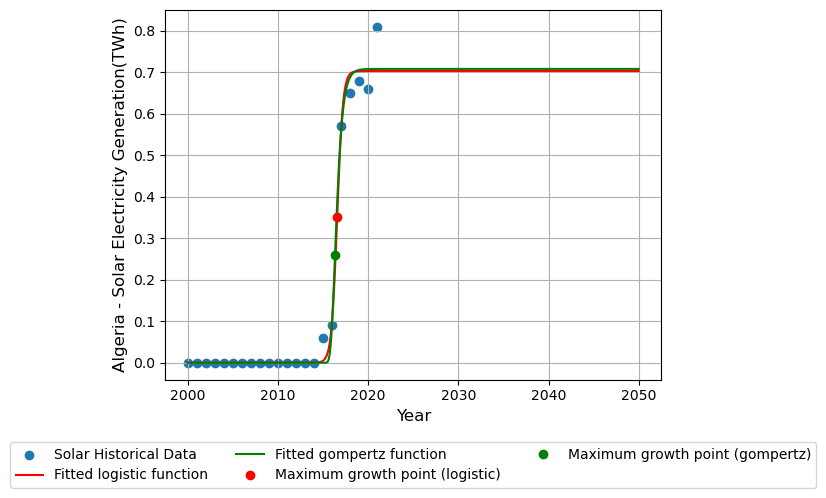

Logistic function parameters:
L_logistic=  3.458828028647892
K_logistic=  1.0347619095181704
T_logistic(inflection point) =  2020.4390057021308
Maximum growth rate (logistic) =  0.8947658739046654
2050_logistic =  3.458828028647712

Gompertz function parameters:
L_gompertz=  4.681235344694361
K_gompertz=  0.4665612981712153
T_gompertz(inflection point)=  2020.424802382295
Maximum growth rate (gompertz) =  0.80347932160651
2050_gompertz =  4.681230583828797


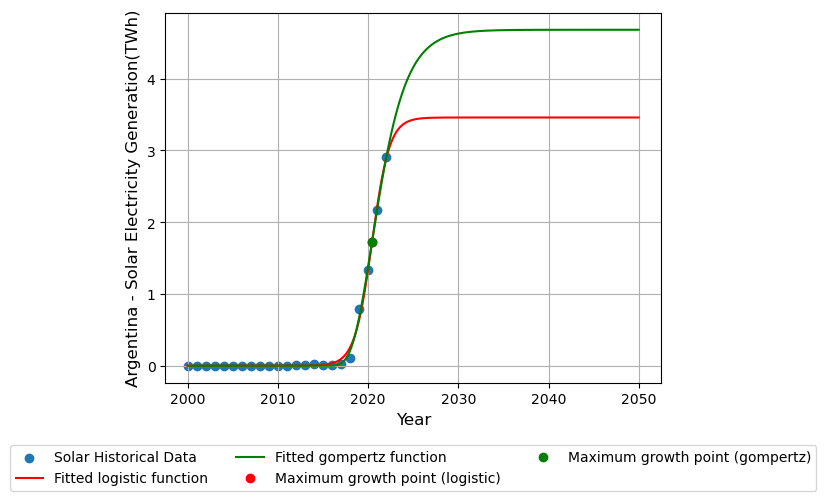

Logistic function parameters:
L_logistic=  76.82064044609285
K_logistic=  0.36816306845125235
T_logistic(inflection point) =  2022.5899583355822
Maximum growth rate (logistic) =  7.070630676755982
2050_logistic =  76.81745745242691

Gompertz function parameters:
L_gompertz=  5150.548726946517
K_gompertz=  0.04792934019499834
T_gompertz(inflection point)=  2055.58633309228
Maximum growth rate (gompertz) =  90.81560253988746
2050_gompertz =  1393.8697642638158


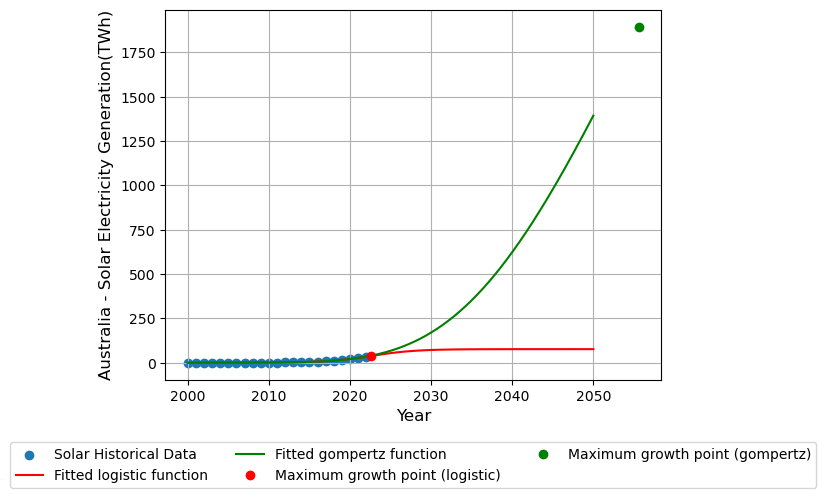

Logistic function parameters:
L_logistic=  4.311731484617702
K_logistic=  0.2975612246424475
T_logistic(inflection point) =  2019.9265889650112
Maximum growth rate (logistic) =  0.3207510252230604
2050_logistic =  4.311171427260941

Gompertz function parameters:
L_gompertz=  9.673182298423853
K_gompertz=  0.09727459679609973
T_gompertz(inflection point)=  2024.1718782466378
Maximum growth rate (gompertz) =  0.346157965654269
2050_gompertz =  8.919907242873425


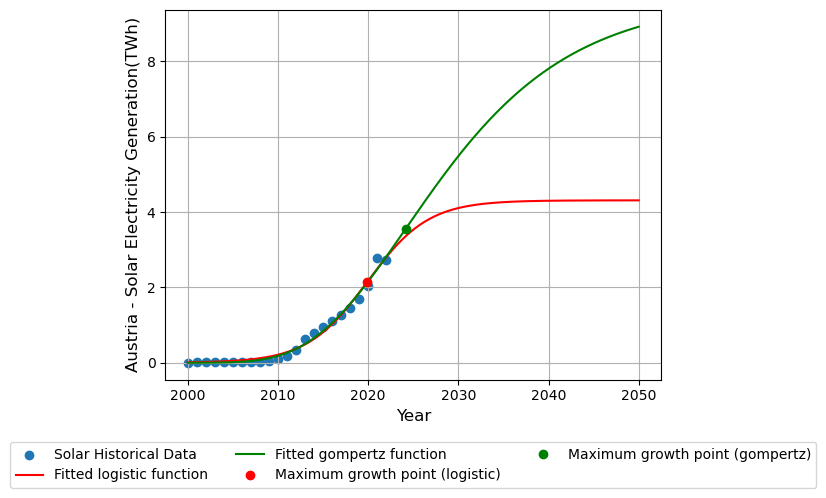

Logistic function parameters:
L_logistic=  534.758731817019
K_logistic=  0.19199355870647367
T_logistic(inflection point) =  2057.2511446772514
Maximum growth rate (logistic) =  25.66755799272756
2050_logistic =  106.4496426715755

Gompertz function parameters:
L_gompertz=  4169.5546862186
K_gompertz=  0.019642257829232054
T_gompertz(inflection point)=  2132.959671820346
Maximum growth rate (gompertz) =  30.129130586218917
2050_gompertz =  25.385121544051266


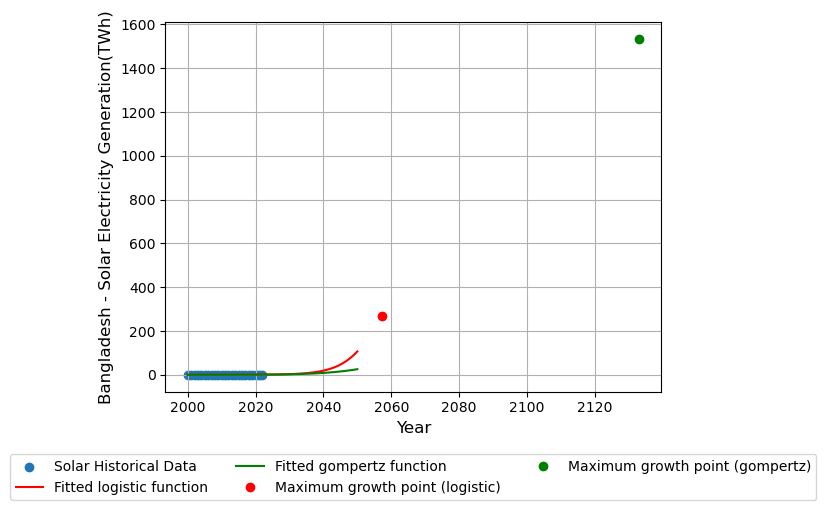

Logistic function parameters:
L_logistic=  0.18374578119075707
K_logistic=  2.1395946830671693
T_logistic(inflection point) =  2016.934799713062
Maximum growth rate (logistic) =  0.09828537411794183
2050_logistic =  0.18374578119075707

Gompertz function parameters:
L_gompertz=  0.18629641254161777
K_gompertz=  1.3493400386541108
T_gompertz(inflection point)=  2016.588967508189
Maximum growth rate (gompertz) =  0.09247650698622771
2050_gompertz =  0.18629641254161777


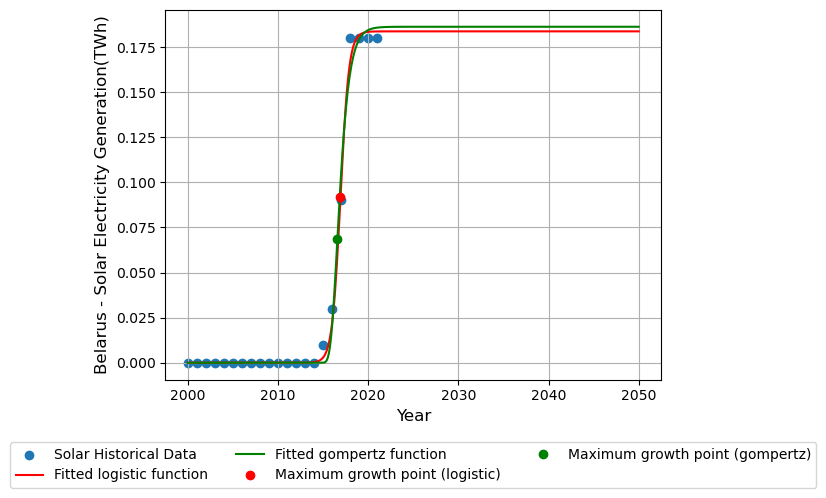

Logistic function parameters:
L_logistic=  9.988533290646876
K_logistic=  0.24206881396816168
T_logistic(inflection point) =  2019.3259477015977
Maximum growth rate (logistic) =  0.6044781017370972
2050_logistic =  9.982583442258518

Gompertz function parameters:
L_gompertz=  15.677794307150867
K_gompertz=  0.09808881968298058
T_gompertz(inflection point)=  2020.7101916791685
Maximum growth rate (gompertz) =  0.5657310153497759
2050_gompertz =  14.816129305680862


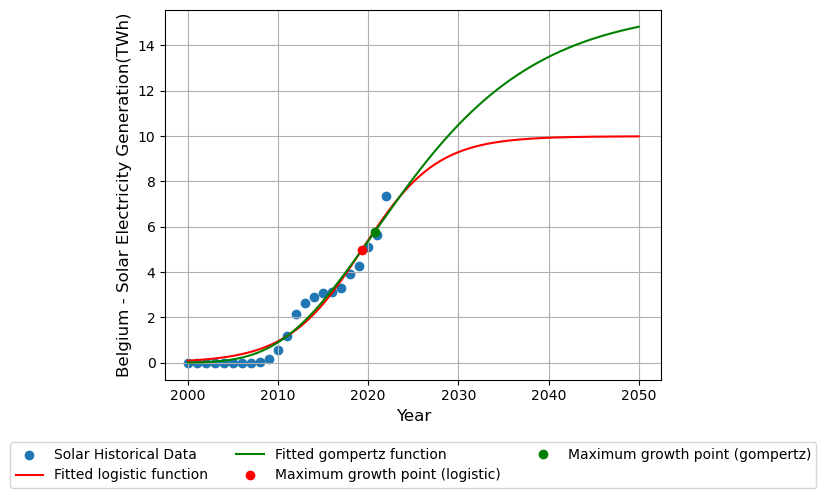

Logistic function parameters:
L_logistic=  56.52577678319737
K_logistic=  0.6739046075091166
T_logistic(inflection point) =  2022.2077057022216
Maximum growth rate (logistic) =  9.523245354307141
2050_logistic =  56.52577636806086

Gompertz function parameters:
L_gompertz=  328.0846077130483
K_gompertz=  0.1533215053024454
T_gompertz(inflection point)=  2028.0411781494845
Maximum growth rate (gompertz) =  18.505228337432023
2050_gompertz =  316.95831661848456


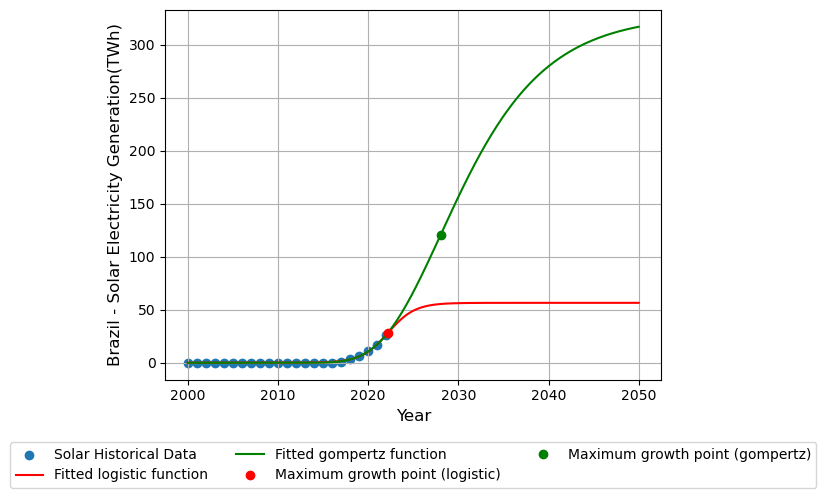

Logistic function parameters:
L_logistic=  1.4310017038004168
K_logistic=  2.807116706478694
T_logistic(inflection point) =  2011.931988649014
Maximum growth rate (logistic) =  1.0042471974344065
2050_logistic =  1.4310017038004168

Gompertz function parameters:
L_gompertz=  1.4412546971827214
K_gompertz=  1.6118718221021686
T_gompertz(inflection point)=  2011.6561109267936
Maximum growth rate (gompertz) =  0.8546272908641576
2050_gompertz =  1.4412546971827214


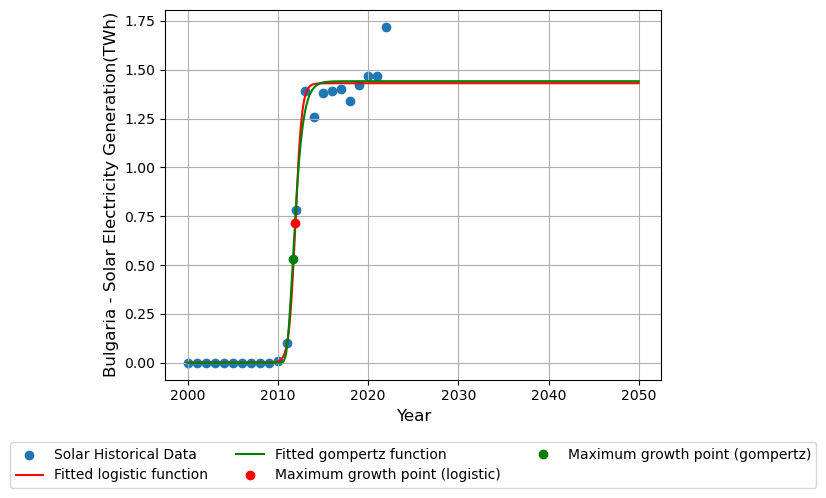

Logistic function parameters:
L_logistic=  5.023452306555311
K_logistic=  0.5050085187592468
T_logistic(inflection point) =  2014.7291725976013
Maximum growth rate (logistic) =  0.6342215520978048
2050_logistic =  5.023452214230314

Gompertz function parameters:
L_gompertz=  5.654071580144173
K_gompertz=  0.2777136032424103
T_gompertz(inflection point)=  2013.9128626582497
Maximum growth rate (gompertz) =  0.5776489306859244
2050_gompertz =  5.653820448990574


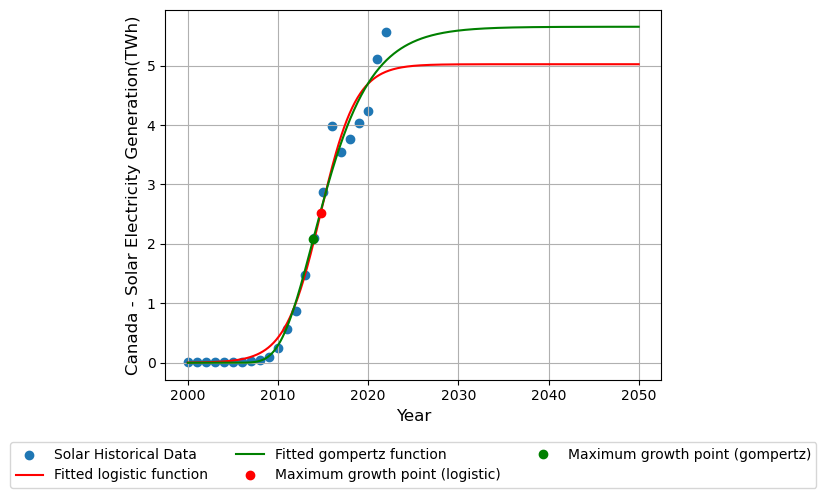

Logistic function parameters:
L_logistic=  31.920197689832417
K_logistic=  0.39078046539781663
T_logistic(inflection point) =  2022.6006585730966
Maximum growth rate (logistic) =  3.118447427205756
2050_logistic =  31.919483177866244

Gompertz function parameters:
L_gompertz=  138.46333202004553
K_gompertz=  0.09767930030726354
T_gompertz(inflection point)=  2030.4836183771858
Maximum growth rate (gompertz) =  4.975569953170564
2050_gompertz =  119.34078647135878


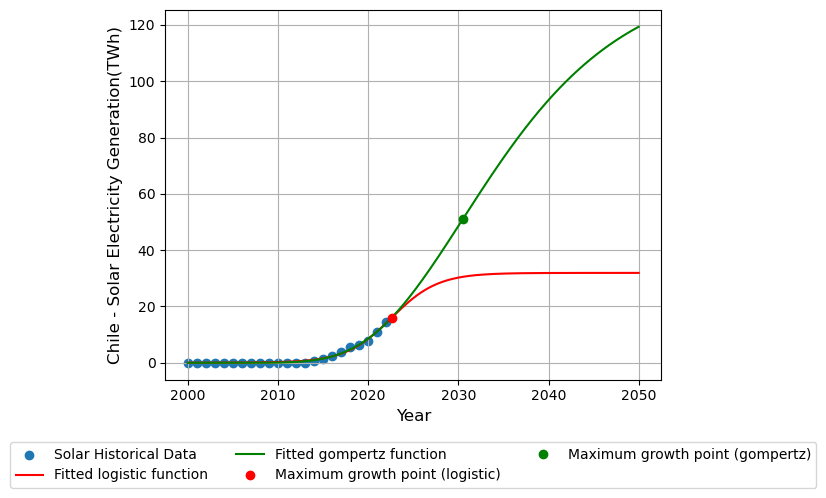

Logistic function parameters:
L_logistic=  559.3838833238673
K_logistic=  0.47594027108120285
T_logistic(inflection point) =  2020.0002191041349
Maximum growth rate (logistic) =  66.55832926690434
2050_logistic =  559.3835311087752

Gompertz function parameters:
L_gompertz=  1026.775174782218
K_gompertz=  0.17396710652496106
T_gompertz(inflection point)=  2021.5558534750207
Maximum growth rate (gompertz) =  65.71250425118122
2050_gompertz =  1019.5158491768727


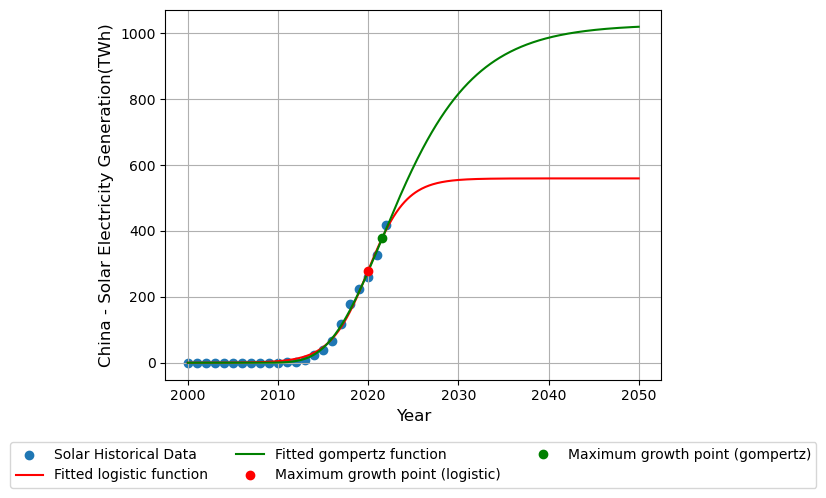

Logistic function parameters:
L_logistic=  0.8223337673444923
K_logistic=  0.7856907529452228
T_logistic(inflection point) =  2021.5232148124014
Maximum growth rate (logistic) =  0.16152500920929397
2050_logistic =  0.8223337671866706

Gompertz function parameters:
L_gompertz=  2.031932300530386
K_gompertz=  0.24675826440820553
T_gompertz(inflection point)=  2023.4452496559802
Maximum growth rate (gompertz) =  0.18445331261257947
2050_gompertz =  2.029036025985526


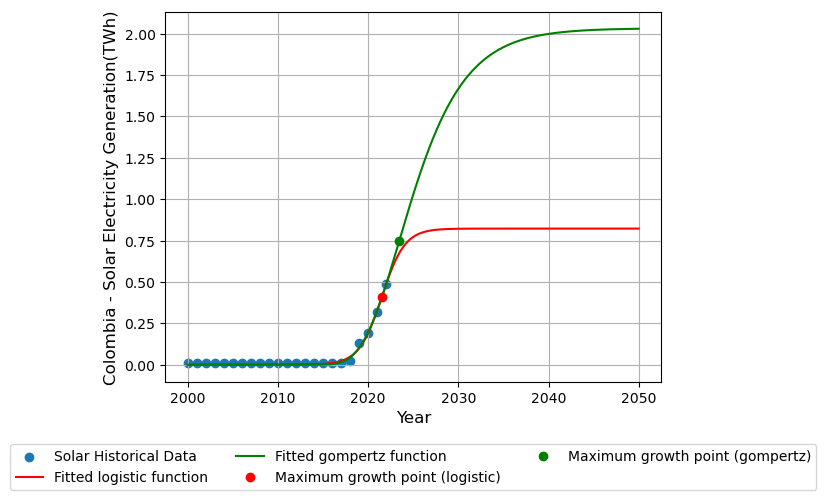

Logistic function parameters:
L_logistic=  2.2523388091823286
K_logistic=  4.1590508282182945
T_logistic(inflection point) =  2010.2301499340003
Maximum growth rate (logistic) =  2.341897897439493
2050_logistic =  2.2523388091823286

Gompertz function parameters:
L_gompertz=  2.251651253828742
K_gompertz=  3.6019027541018698
T_gompertz(inflection point)=  2010.0705271339878
Maximum growth rate (gompertz) =  2.983586458009119
2050_gompertz =  2.251651253828742


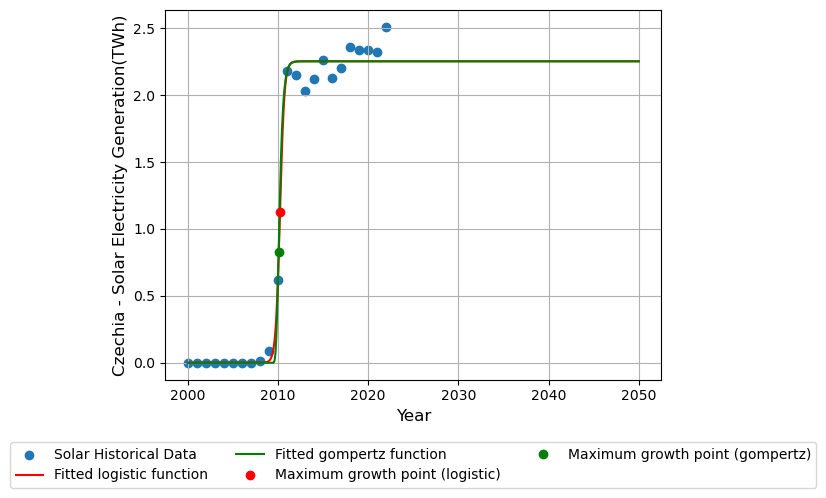

Logistic function parameters:
L_logistic=  4.425253018349782
K_logistic=  0.2449401425947904
T_logistic(inflection point) =  2023.6174258889318
Maximum growth rate (logistic) =  0.27098052633315556
2050_logistic =  4.418354055729904

Gompertz function parameters:
L_gompertz=  10.25915110707783
K_gompertz=  0.07589576494031959
T_gompertz(inflection point)=  2029.5558179782408
Maximum growth rate (gompertz) =  0.28644054224185816
2050_gompertz =  8.30009645409969


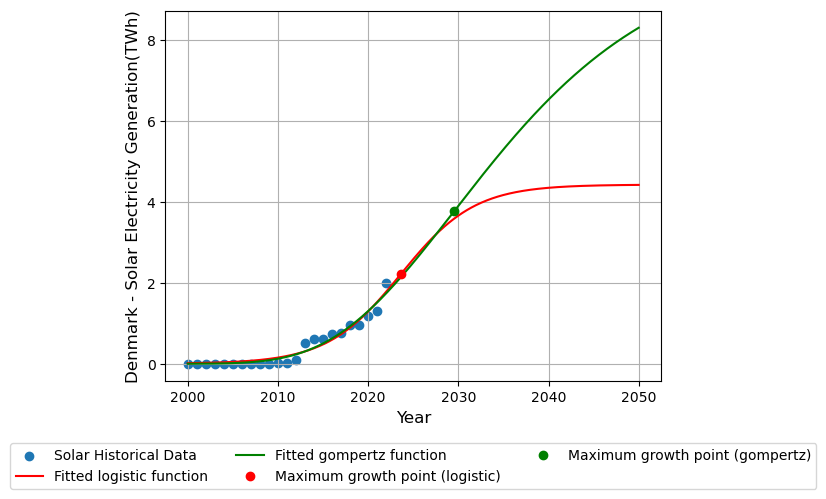

Logistic function parameters:
L_logistic=  4.868156740785474
K_logistic=  2.416352781579719
T_logistic(inflection point) =  2018.251548703165
Maximum growth rate (logistic) =  2.9407960204407595
2050_logistic =  4.868156740785474

Gompertz function parameters:
L_gompertz=  4.814571624103544
K_gompertz=  2.503225391834131
T_gompertz(inflection point)=  2018.0555775077983
Maximum growth rate (gompertz) =  4.433667552084606
2050_gompertz =  4.814571624103544


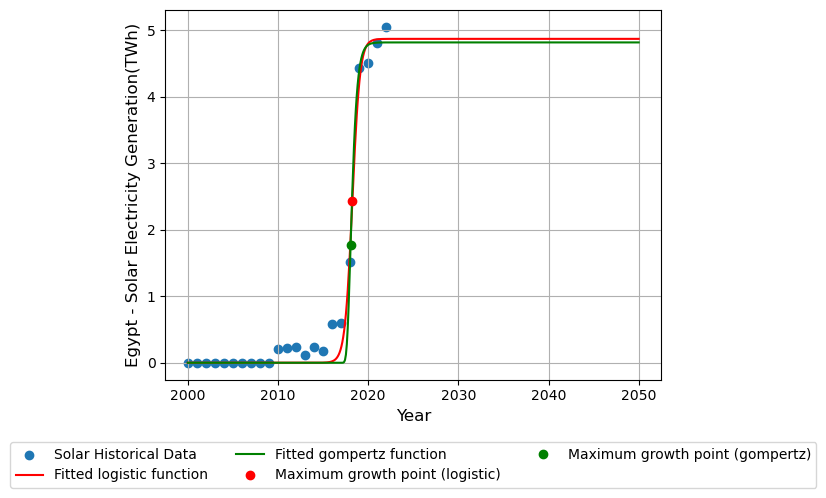

Logistic function parameters:
L_logistic=  0.3407915639471991
K_logistic=  0.850434010557456
T_logistic(inflection point) =  2019.2056905540062
Maximum growth rate (logistic) =  0.07245518412294107
2050_logistic =  0.34079156394575716

Gompertz function parameters:
L_gompertz=  0.4107700701239508
K_gompertz=  0.42690341443090674
T_gompertz(inflection point)=  2018.8726337137018
Maximum growth rate (gompertz) =  0.06451102444419686
2050_gompertz =  0.4107693742528947


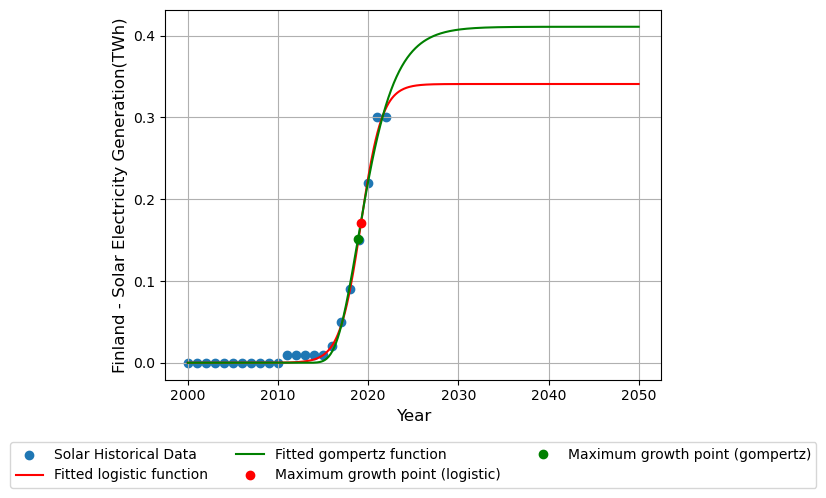

Logistic function parameters:
L_logistic=  25.259245669995988
K_logistic=  0.2817642632426115
T_logistic(inflection point) =  2018.709498283548
Maximum growth rate (logistic) =  1.779288186567636
2050_logistic =  25.255501297213982

Gompertz function parameters:
L_gompertz=  40.93123676131956
K_gompertz=  0.11228383675158564
T_gompertz(inflection point)=  2020.1668221918574
Maximum growth rate (gompertz) =  1.690743122523784
2050_gompertz =  39.51979010330511


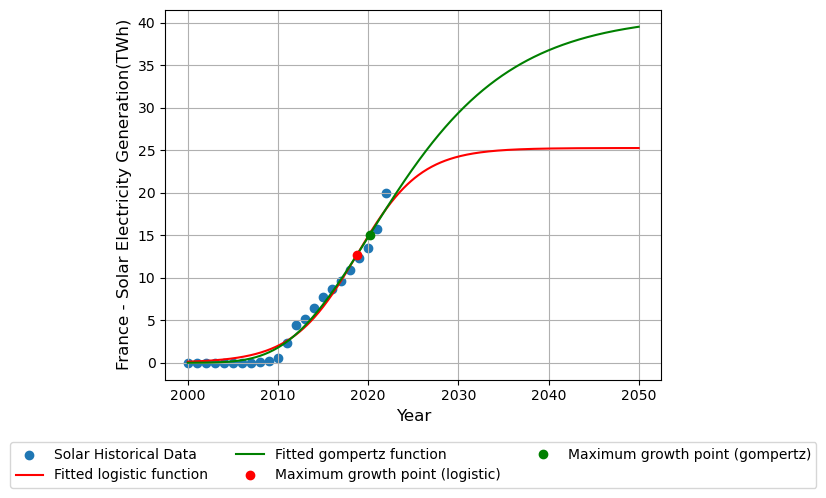

Logistic function parameters:
L_logistic=  50.83636643842767
K_logistic=  0.42685150445868686
T_logistic(inflection point) =  2012.4446066431215
Maximum growth rate (logistic) =  5.424894873863987
2050_logistic =  50.836360889824206

Gompertz function parameters:
L_gompertz=  55.7226037931043
K_gompertz=  0.2463823989958117
T_gompertz(inflection point)=  2011.3581882306462
Maximum growth rate (gompertz) =  5.0506421582566245
2050_gompertz =  55.71851830090222


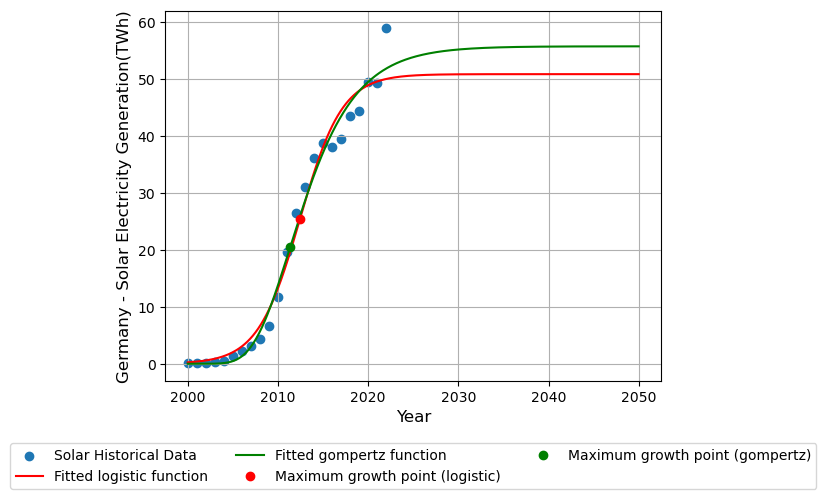

Logistic function parameters:
L_logistic=  4.609860134920919
K_logistic=  1.1245149069396396
T_logistic(inflection point) =  2012.3806732951334
Maximum growth rate (logistic) =  1.295964110156338
2050_logistic =  4.609860134920919

Gompertz function parameters:
L_gompertz=  4.996617670730615
K_gompertz=  0.47422220277805205
T_gompertz(inflection point)=  2011.9647065654765
Maximum growth rate (gompertz) =  0.8716929250845382
2050_gompertz =  4.996617597409662


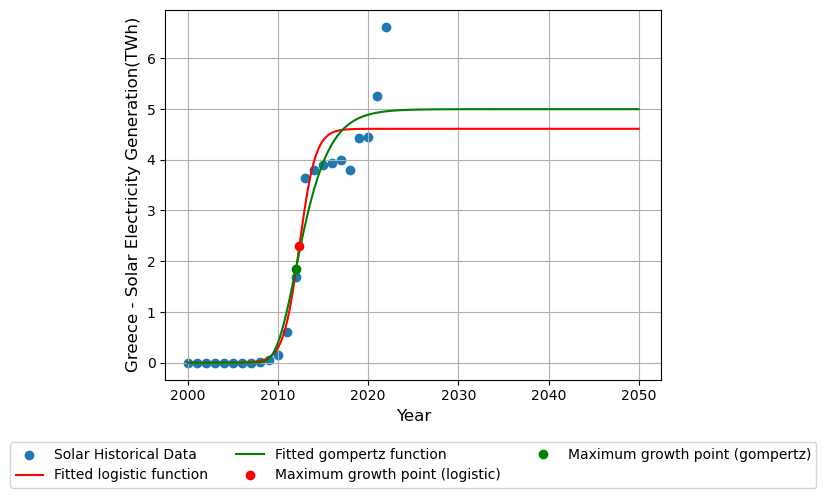

Logistic function parameters:
L_logistic=  5.3634988098303795
K_logistic=  0.8882360138977237
T_logistic(inflection point) =  2020.1116213668354
Maximum growth rate (logistic) =  1.1910132008472303
2050_logistic =  5.363498809814536

Gompertz function parameters:
L_gompertz=  7.617066196133305
K_gompertz=  0.3813266892910147
T_gompertz(inflection point)=  2020.2436433897144
Maximum growth rate (gompertz) =  1.0685391795186252
2050_gompertz =  7.616976268705684


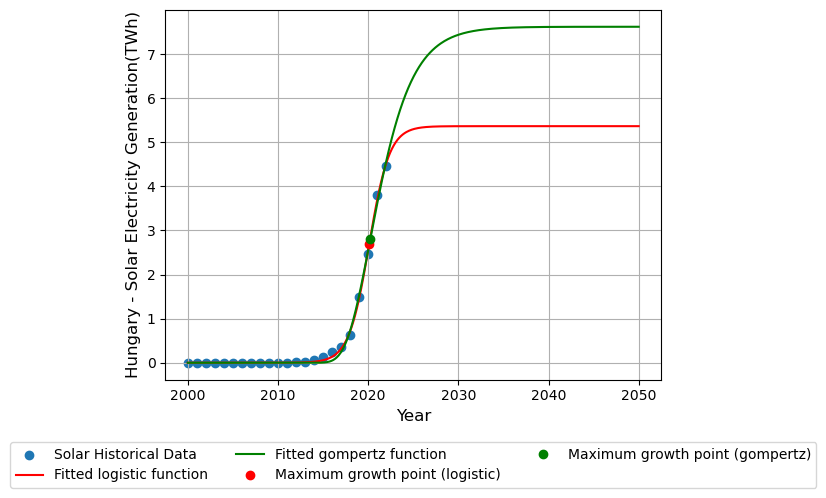

Logistic function parameters:
L_logistic=  142.66540602174166
K_logistic=  0.46273429424397555
T_logistic(inflection point) =  2020.755872573189
Maximum growth rate (logistic) =  16.50404399212521
2050_logistic =  142.66521664267776

Gompertz function parameters:
L_gompertz=  345.4718440449635
K_gompertz=  0.1463668690471201
T_gompertz(inflection point)=  2023.9184470697646
Maximum growth rate (gompertz) =  18.602056500322927
2050_gompertz =  337.9601243756782


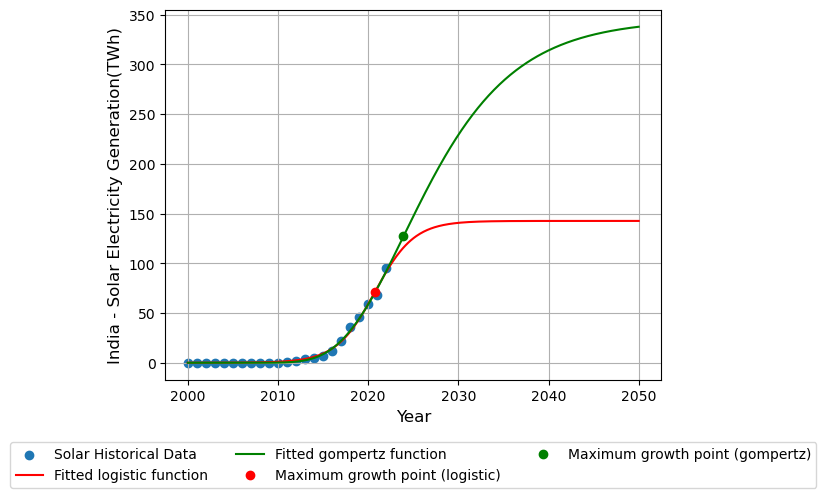

An error occurred with Indonesia: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  0.38070721436646376
K_logistic=  6.55399616410383
T_logistic(inflection point) =  2017.25502238597
Maximum growth rate (logistic) =  0.6237884056511145
2050_logistic =  0.38070721436646376

Gompertz function parameters:
L_gompertz=  0.38000000836417896
K_gompertz=  16.85303166436476
T_gompertz(inflection point)=  2017.0363677924256
Maximum growth rate (gompertz) =  2.355955922734768
2050_gompertz =  0.38000000836417896


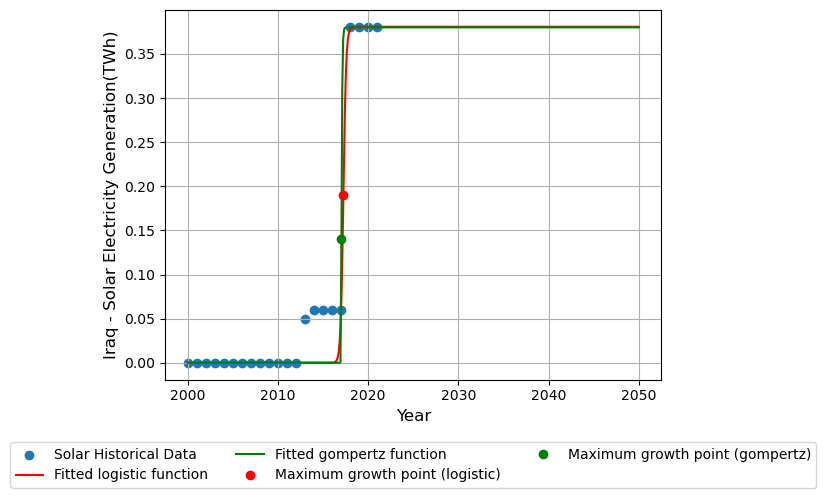

Logistic function parameters:
L_logistic=  0.10300260069517897
K_logistic=  0.9248362681559763
T_logistic(inflection point) =  2019.479310370746
Maximum growth rate (logistic) =  0.023815135209322373
2050_logistic =  0.10300260069512221

Gompertz function parameters:
L_gompertz=  0.1294577643958561
K_gompertz=  0.4339947223387513
T_gompertz(inflection point)=  2019.2784177029066
Maximum growth rate (gompertz) =  0.020668933561397845
2050_gompertz =  0.12945755465770495


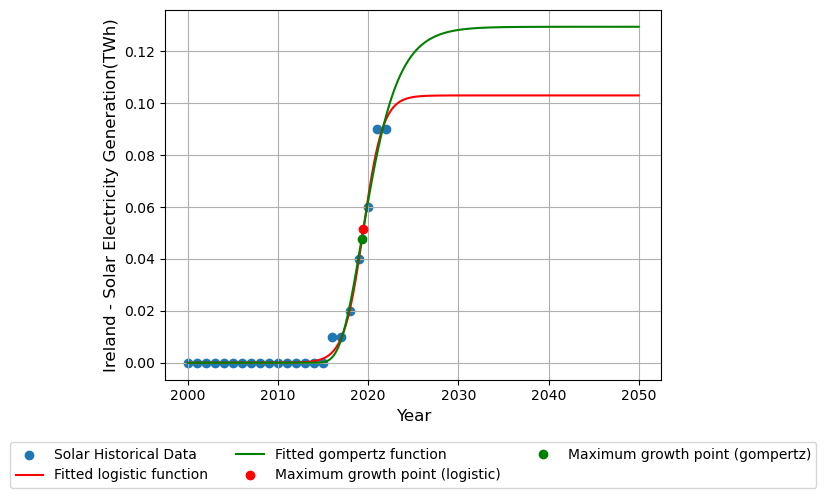

Logistic function parameters:
L_logistic=  136297.11904658962
K_logistic=  0.2753702610417252
T_logistic(inflection point) =  2058.396709786259
Maximum growth rate (logistic) =  9383.04331277362
2050_logistic =  12282.721317742253

Gompertz function parameters:
L_gompertz=  63231199465361.41
K_gompertz=  0.008825553537974352
T_gompertz(inflection point)=  2407.3527182651687
Maximum growth rate (gompertz) =  205295245809.09003
2050_gompertz =  4238.971429819568


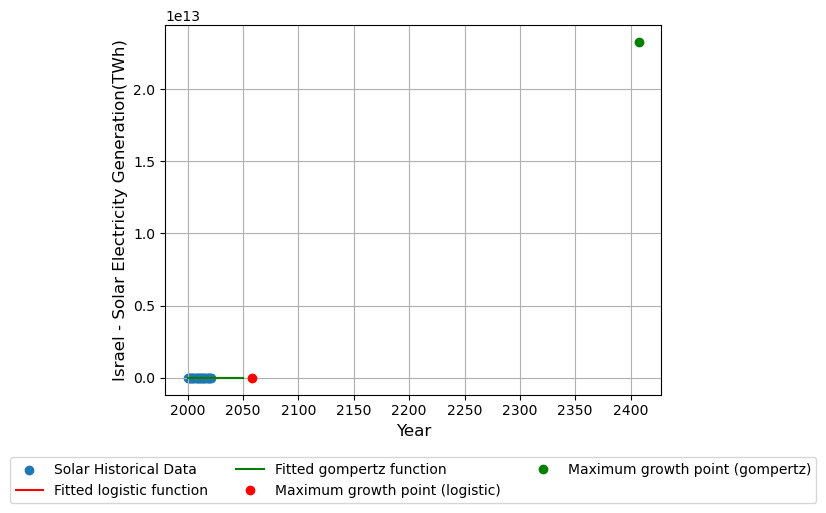

Logistic function parameters:
L_logistic=  23.94043711925816
K_logistic=  1.5842379099405262
T_logistic(inflection point) =  2011.2013031336385
Maximum growth rate (logistic) =  9.481837016219034
2050_logistic =  23.94043711925816

Gompertz function parameters:
L_gompertz=  24.152950590730878
K_gompertz=  1.0496557319889497
T_gompertz(inflection point)=  2010.802437292761
Maximum growth rate (gompertz) =  9.326583714234811
2050_gompertz =  24.152950590730878


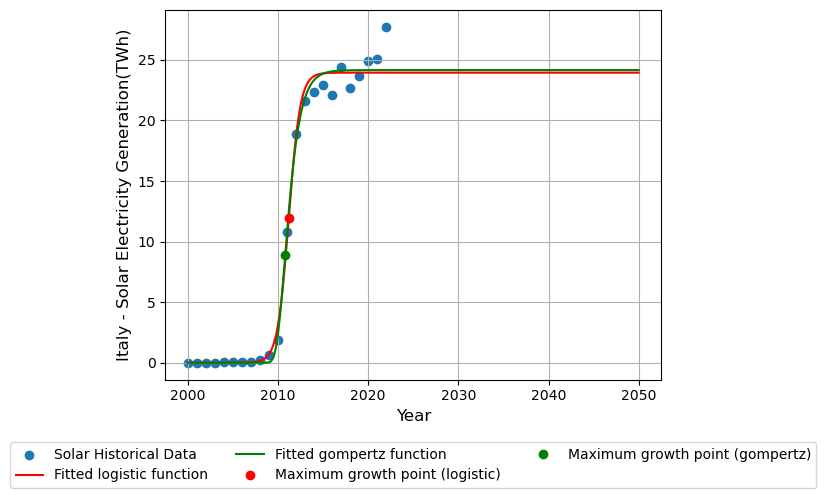

Logistic function parameters:
L_logistic=  104.8517823544825
K_logistic=  0.43261871178282535
T_logistic(inflection point) =  2016.9808083035255
Maximum growth rate (logistic) =  11.34021075258235
2050_logistic =  104.85171677010544

Gompertz function parameters:
L_gompertz=  129.8326845843164
K_gompertz=  0.2164840427107624
T_gompertz(inflection point)=  2016.483809220089
Maximum growth rate (gompertz) =  10.339878720646631
2050_gompertz =  129.74103904139562


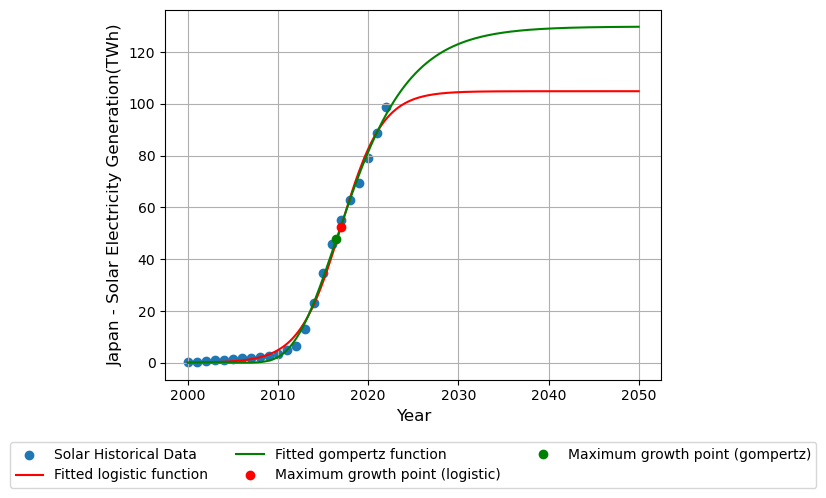

Logistic function parameters:
L_logistic=  1.3701130485131383
K_logistic=  2.7822800128913254
T_logistic(inflection point) =  2019.2933292860002
Maximum growth rate (logistic) =  0.9530095375699269
2050_logistic =  1.3701130485131383

Gompertz function parameters:
L_gompertz=  1.3601745626122383
K_gompertz=  2.5219704666212324
T_gompertz(inflection point)=  2019.0873063105576
Maximum growth rate (gompertz) =  1.261944232729583
2050_gompertz =  1.3601745626122383


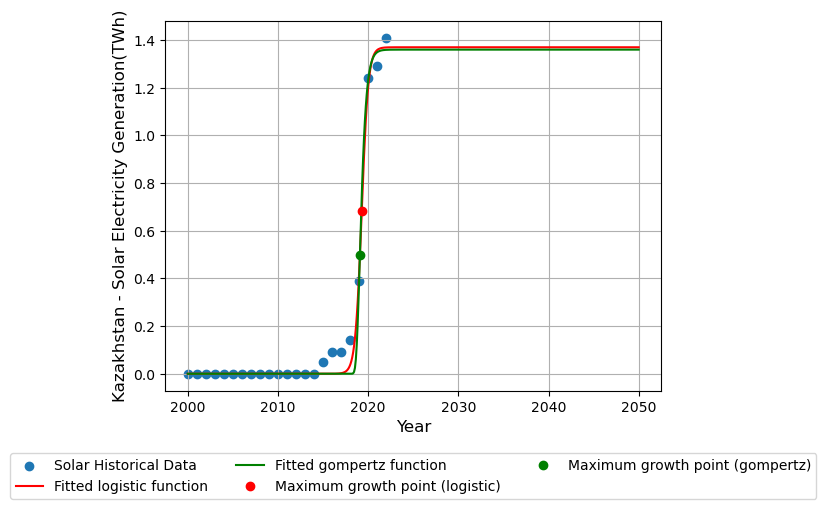

Logistic function parameters:
L_logistic=  0.020531872271576837
K_logistic=  1.3372799813424616
T_logistic(inflection point) =  2016.560558894878
Maximum growth rate (logistic) =  0.006864215442065019
2050_logistic =  0.020531872271576837

Gompertz function parameters:
L_gompertz=  0.02084023672557625
K_gompertz=  0.9106722593626578
T_gompertz(inflection point)=  2016.043559648629
Maximum growth rate (gompertz) =  0.006981846130094564
2050_gompertz =  0.020840236725575476


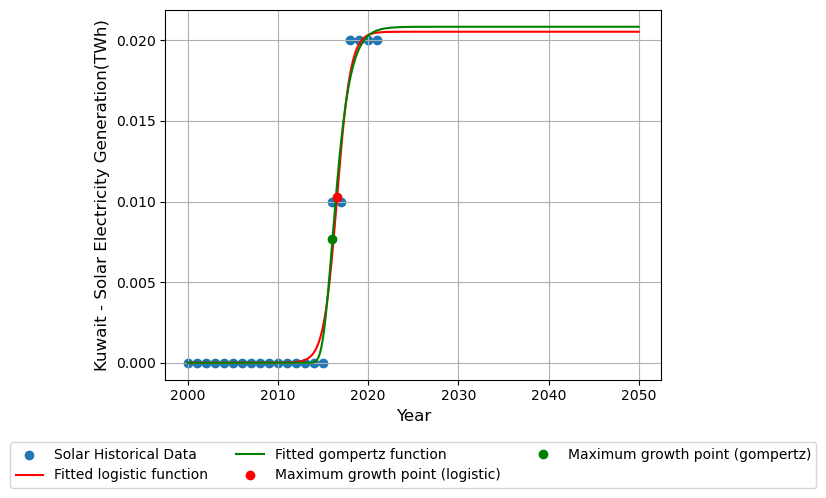

Logistic function parameters:
L_logistic=  5.1757966746756034
K_logistic=  0.3796258385038137
T_logistic(inflection point) =  2023.239237575774
Maximum growth rate (logistic) =  0.49121653813724414
2050_logistic =  5.1755962600726635

Gompertz function parameters:
L_gompertz=  166.47895935673333
K_gompertz=  0.057815592768287176
T_gompertz(inflection point)=  2047.7134516504439
Maximum growth rate (gompertz) =  3.540868948130167
2050_gompertz =  69.31778869169146


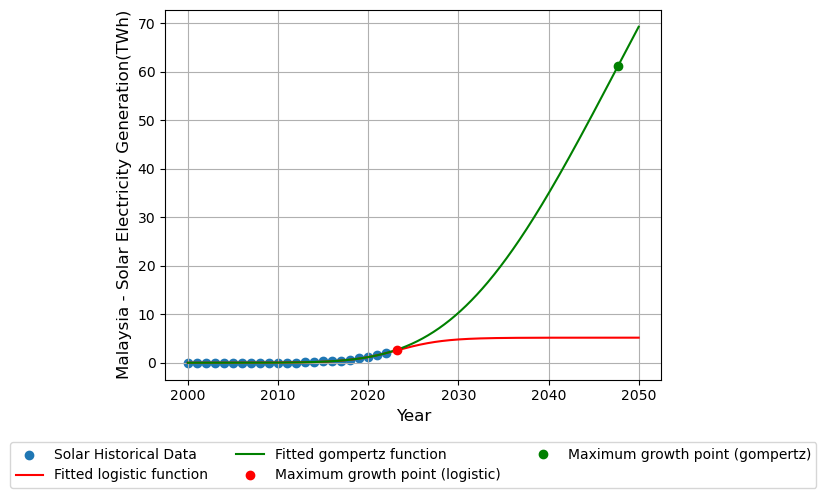

Logistic function parameters:
L_logistic=  13.897729772630473
K_logistic=  1.7484860899992396
T_logistic(inflection point) =  2019.0515009218102
Maximum growth rate (logistic) =  6.07499679750317
2050_logistic =  13.897729772630473

Gompertz function parameters:
L_gompertz=  14.199413746063117
K_gompertz=  1.217146186514716
T_gompertz(inflection point)=  2018.7168174140943
Maximum growth rate (gompertz) =  6.3579729337935165
2050_gompertz =  14.199413746063117


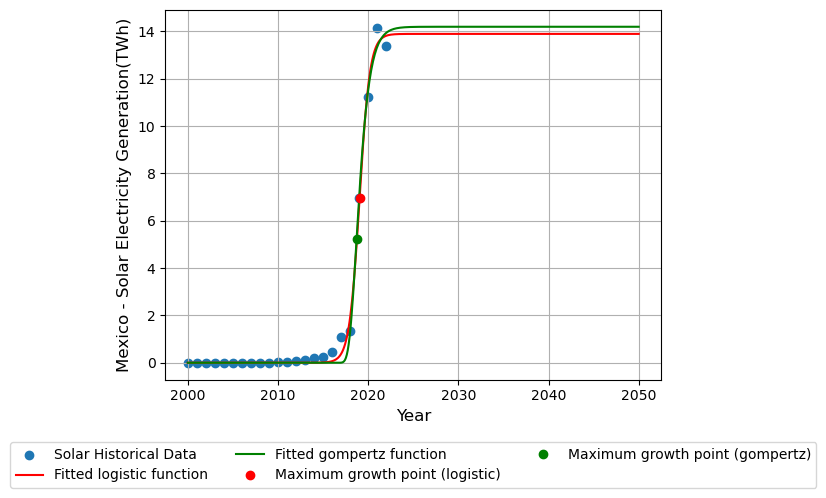

Logistic function parameters:
L_logistic=  197.6993253206265
K_logistic=  0.41309959995222684
T_logistic(inflection point) =  2027.6370711855625
Maximum growth rate (logistic) =  20.417378050193992
2050_logistic =  197.68009884258478

Gompertz function parameters:
L_gompertz=  9399228570.012812
K_gompertz=  0.018829413473138264
T_gompertz(inflection point)=  2181.362234436068
Maximum growth rate (gompertz) =  65108024.93707353
2050_gompertz =  66191.41518102508


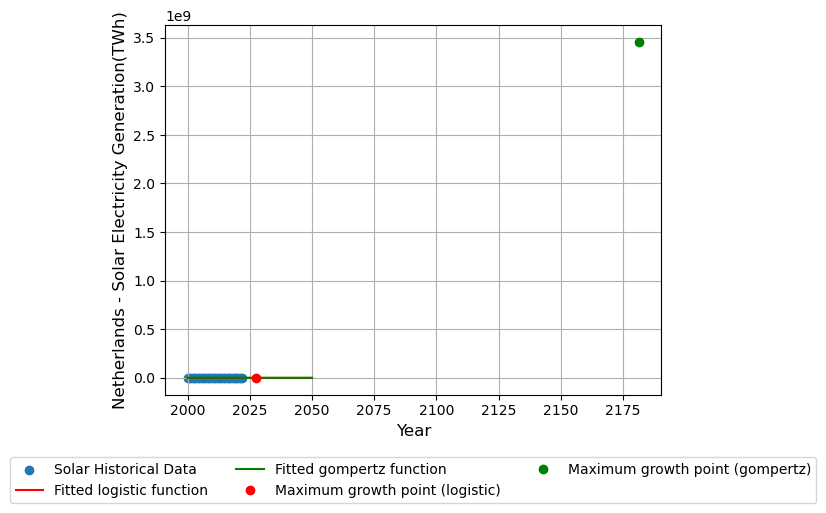

Logistic function parameters:
L_logistic=  0.23945626059213343
K_logistic=  0.5108870241906556
T_logistic(inflection point) =  2018.485177092665
Maximum growth rate (logistic) =  0.0305837740994343
2050_logistic =  0.23945623622178572

Gompertz function parameters:
L_gompertz=  0.3310081732179917
K_gompertz=  0.22380256741955035
T_gompertz(inflection point)=  2018.5598083646037
Maximum growth rate (gompertz) =  0.027252685217351778
2050_gompertz =  0.3307172489093654


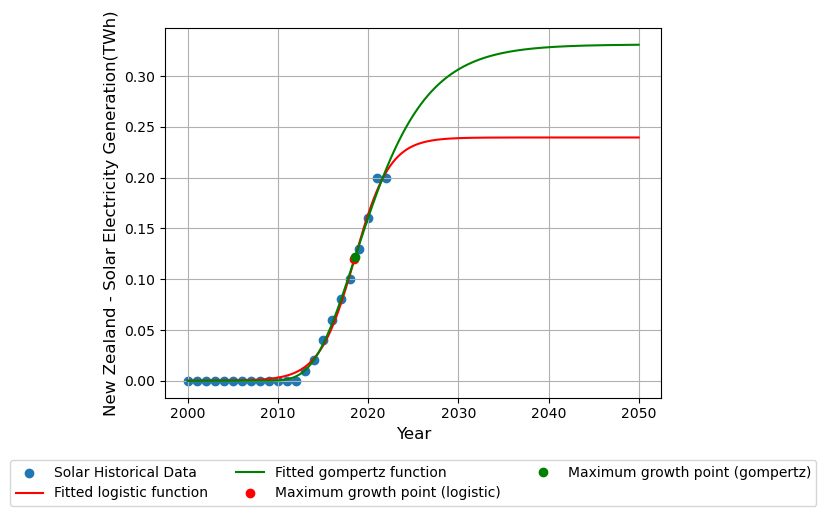

Logistic function parameters:
L_logistic=  0.17024569028845923
K_logistic=  4.30863043442082
T_logistic(inflection point) =  2019.6442704147623
Maximum growth rate (logistic) =  0.18338144062645914
2050_logistic =  0.17024569028845923

Gompertz function parameters:
L_gompertz=  0.1711961978331971
K_gompertz=  2.65706434130676
T_gompertz(inflection point)=  2019.3940308224085
Maximum growth rate (gompertz) =  0.16734074733073212
2050_gompertz =  0.1711961978331971


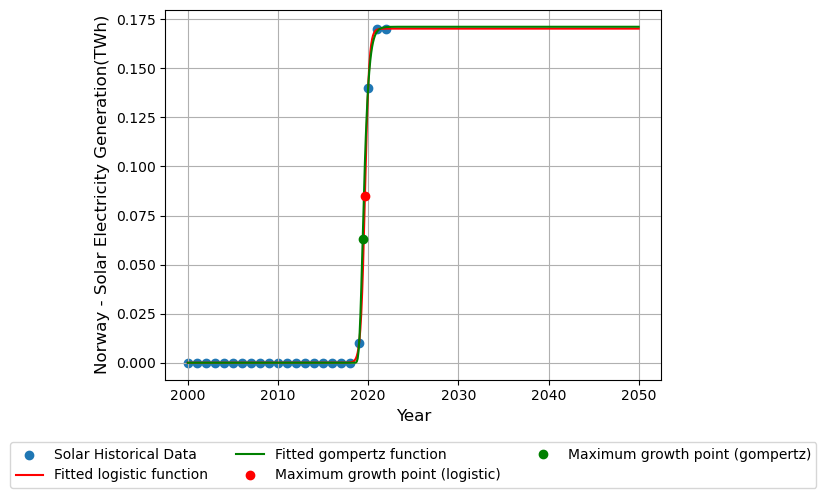

Logistic function parameters:
L_logistic=  1.3394251089264217
K_logistic=  0.5510974910359233
T_logistic(inflection point) =  2016.4410154648301
Maximum growth rate (logistic) =  0.18453845423996734
2050_logistic =  1.339425096482477

Gompertz function parameters:
L_gompertz=  1.5565029105381536
K_gompertz=  0.29339948803852844
T_gompertz(inflection point)=  2015.8182339130663
Maximum growth rate (gompertz) =  0.16800213734322664
2050_gompertz =  1.5564342607932944


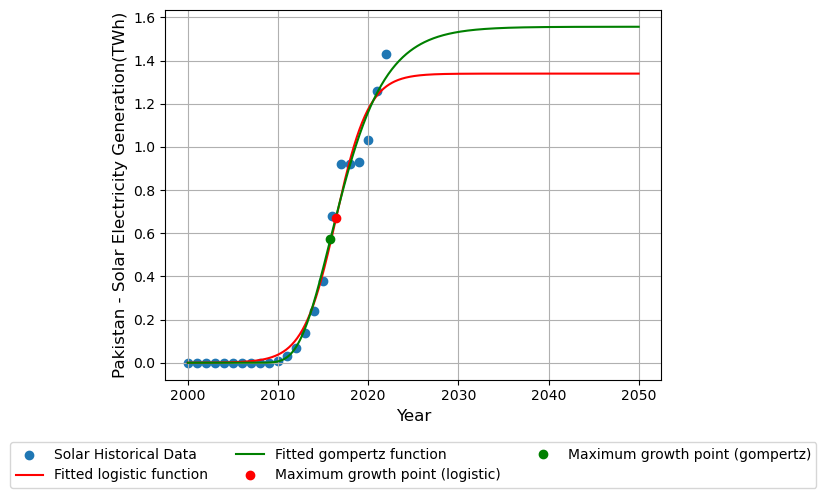

Logistic function parameters:
L_logistic=  0.9377107719446337
K_logistic=  0.5012601295115063
T_logistic(inflection point) =  2016.6632412570907
Maximum growth rate (logistic) =  0.11750925574732542
2050_logistic =  0.9377107200837898

Gompertz function parameters:
L_gompertz=  1.1471785826581982
K_gompertz=  0.2379387480333155
T_gompertz(inflection point)=  2016.117298017325
Maximum growth rate (gompertz) =  0.10041572322287903
2050_gompertz =  1.146816942113795


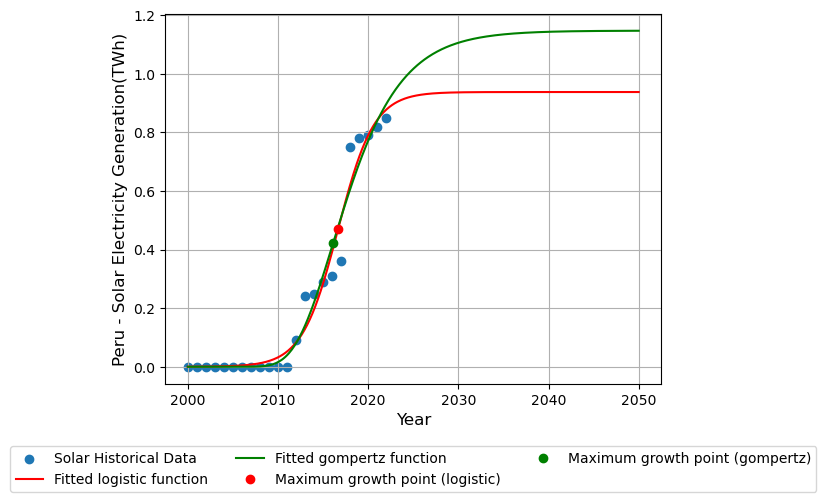

Logistic function parameters:
L_logistic=  40.983398575070325
K_logistic=  0.8353888876020407
T_logistic(inflection point) =  2023.6691550468258
Maximum growth rate (logistic) =  8.559268936444765
2050_logistic =  40.983398563598

Gompertz function parameters:
L_gompertz=  303367.4388684749
K_gompertz=  0.0659814153089745
T_gompertz(inflection point)=  2057.673506390805
Maximum growth rate (gompertz) =  7363.700395461903
2050_gompertz =  57730.701330717166


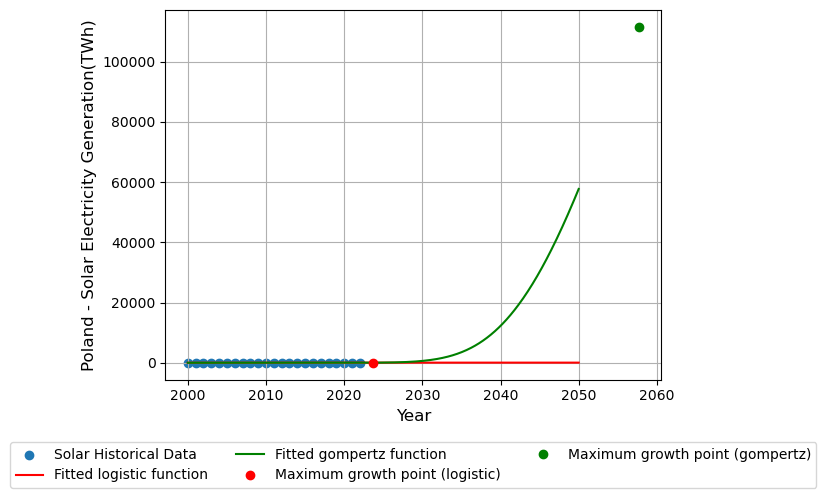

An error occurred with Portugal: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  1.802885339950793
K_logistic=  3.476492163921395
T_logistic(inflection point) =  2013.3463272912343
Maximum growth rate (logistic) =  1.566929189196923
2050_logistic =  1.802885339950793

Gompertz function parameters:
L_gompertz=  1.8021250814280558
K_gompertz=  2.7802002487579336
T_gompertz(inflection point)=  2013.137106611626
Maximum growth rate (gompertz) =  1.8431748125688063
2050_gompertz =  1.8021250814280558


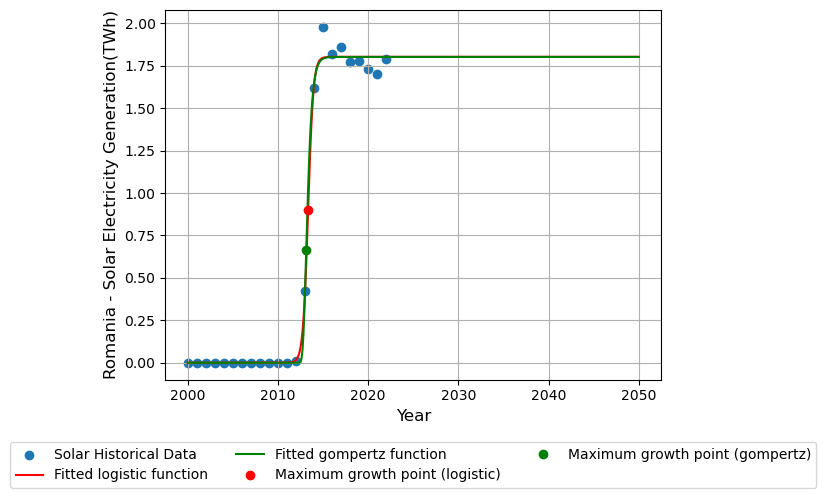

Logistic function parameters:
L_logistic=  3.3624848315739864
K_logistic=  0.5922660272921362
T_logistic(inflection point) =  2019.680025450815
Maximum growth rate (logistic) =  0.49787138325659813
2050_logistic =  3.3624847781395624

Gompertz function parameters:
L_gompertz=  6.784341128416813
K_gompertz=  0.19277453969761218
T_gompertz(inflection point)=  2021.5065463787585
Maximum growth rate (gompertz) =  0.4811304789994974
2050_gompertz =  6.756472471911606


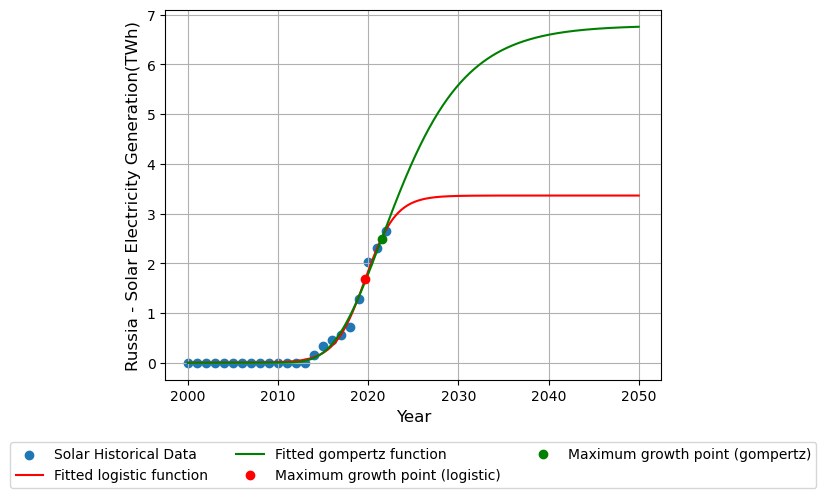

An error occurred with Saudi Arabia: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  6.282664985376637
K_logistic=  0.611140415404915
T_logistic(inflection point) =  2016.4184924210167
Maximum growth rate (logistic) =  0.959897622253248
2050_logistic =  6.282664977701058

Gompertz function parameters:
L_gompertz=  6.849381294880411
K_gompertz=  0.3625244665442624
T_gompertz(inflection point)=  2015.6082458422634
Maximum growth rate (gompertz) =  0.9134697786257086
2050_gompertz =  6.849354935752363


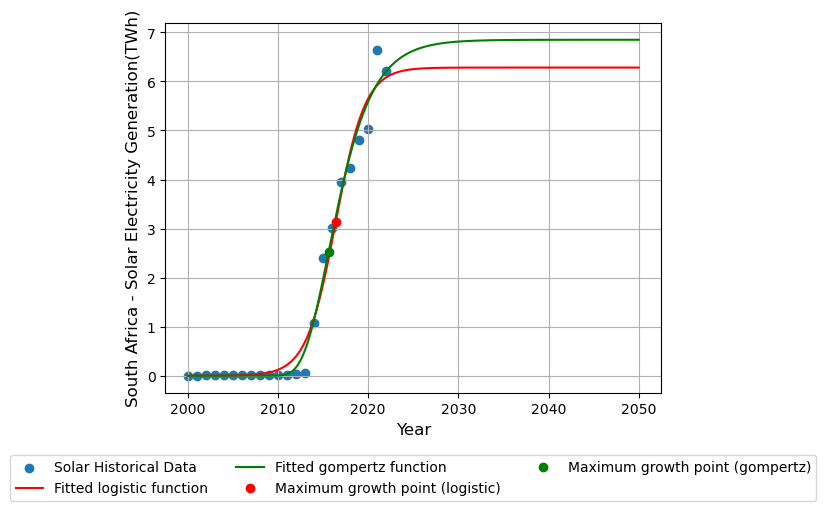

Logistic function parameters:
L_logistic=  69.06680069345136
K_logistic=  0.3767506656489924
T_logistic(inflection point) =  2022.7925529010681
Maximum growth rate (logistic) =  6.5052407838760224
2050_logistic =  69.0643597849803

Gompertz function parameters:
L_gompertz=  2206.133459255527
K_gompertz=  0.05687723599057962
T_gompertz(inflection point)=  2047.6840541510335
Maximum growth rate (gompertz) =  46.16106103314626
2050_gompertz =  918.1991650004144


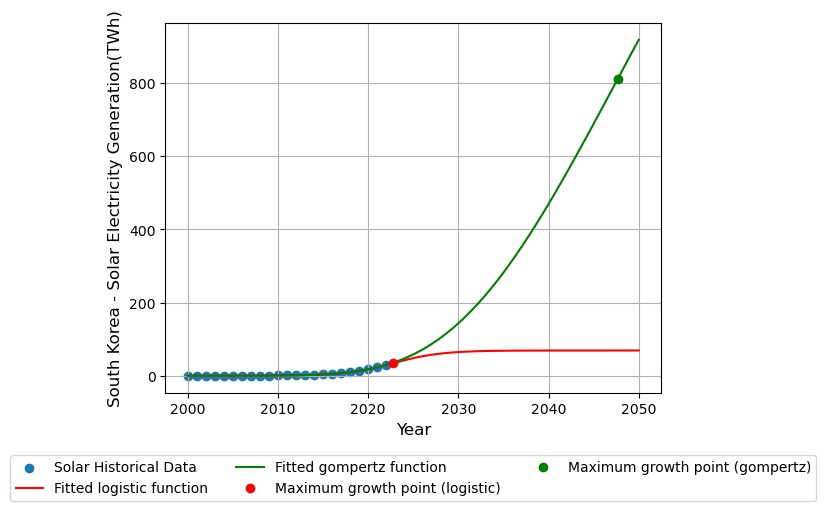

Logistic function parameters:
L_logistic=  1787.143742421996
K_logistic=  0.14091626976843752
T_logistic(inflection point) =  2050.8604721895963
Maximum growth rate (logistic) =  62.95940743052825
2050_logistic =  839.463330766173

Gompertz function parameters:
L_gompertz=  387.5339898607185
K_gompertz=  0.040252839195113695
T_gompertz(inflection point)=  2045.8376622247172
Maximum growth rate (gompertz) =  5.738677723989851
2050_gompertz =  166.345304394237


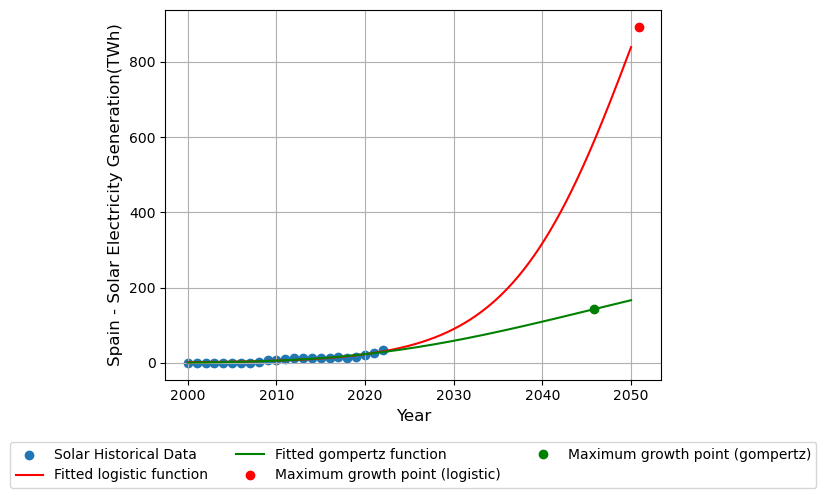

Logistic function parameters:
L_logistic=  9.777400306561411
K_logistic=  0.49191361849101667
T_logistic(inflection point) =  2024.3632624190352
Maximum growth rate (logistic) =  1.2024090910589498
2050_logistic =  9.777367699772853

Gompertz function parameters:
L_gompertz=  6336.995711565731
K_gompertz=  0.04937322968076036
T_gompertz(inflection point)=  2063.882088834484
Maximum growth rate (gompertz) =  115.10136347065023
2050_gompertz =  870.9525550838725


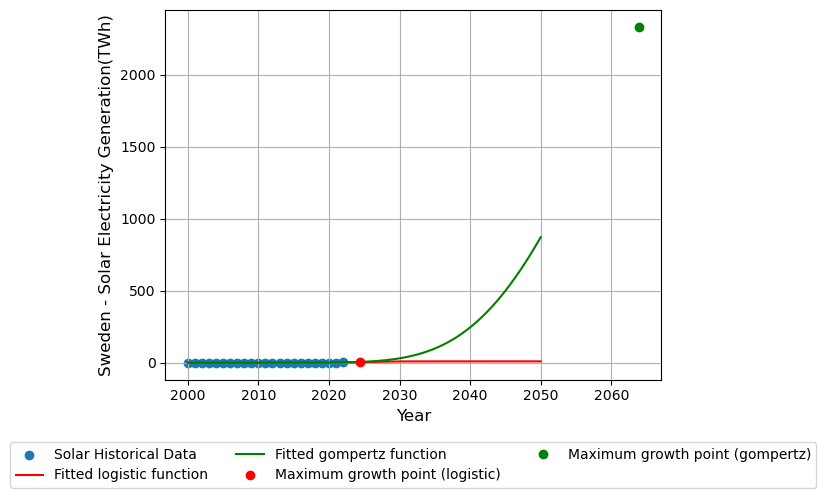

Logistic function parameters:
L_logistic=  3.0548456253755467
K_logistic=  0.45366613460211186
T_logistic(inflection point) =  2016.524398934763
Maximum growth rate (logistic) =  0.34647000166757386
2050_logistic =  3.054844850077056

Gompertz function parameters:
L_gompertz=  3.6619517774576105
K_gompertz=  0.23113844194928646
T_gompertz(inflection point)=  2015.8669729365158
Maximum growth rate (gompertz) =  0.3113797176854154
2050_gompertz =  3.6605799969573765


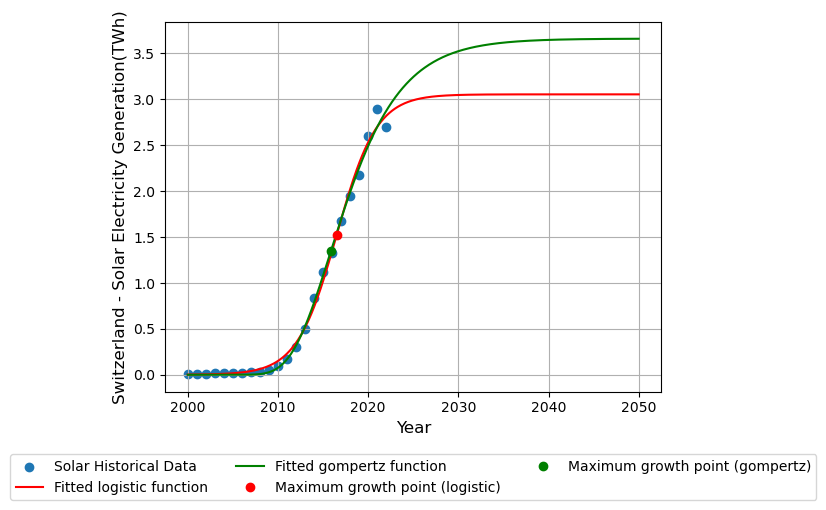

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2010.5
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2010.5
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


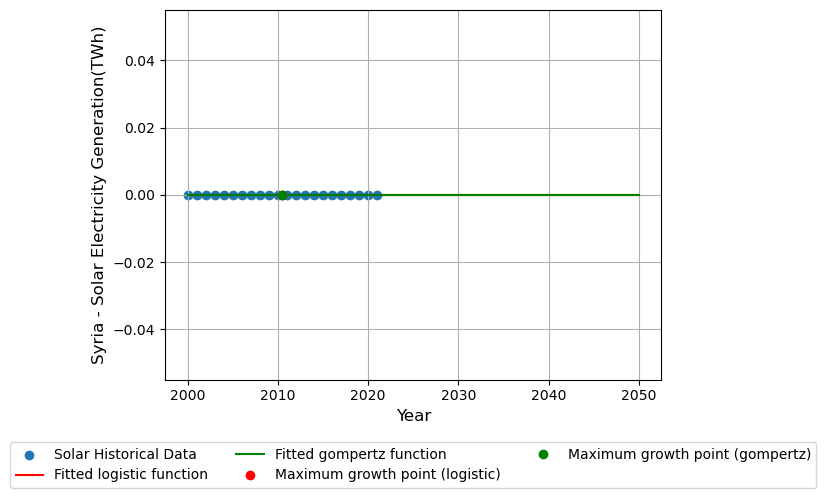

Logistic function parameters:
L_logistic=  4.954575379508451
K_logistic=  0.7776868554305838
T_logistic(inflection point) =  2014.7691911877282
Maximum growth rate (logistic) =  0.9632770367209296
2050_logistic =  4.9545753795022

Gompertz function parameters:
L_gompertz=  5.1228328760079345
K_gompertz=  0.4882630521866025
T_gompertz(inflection point)=  2013.933430226393
Maximum growth rate (gompertz) =  0.9201731732501962
2050_gompertz =  5.122832760769887


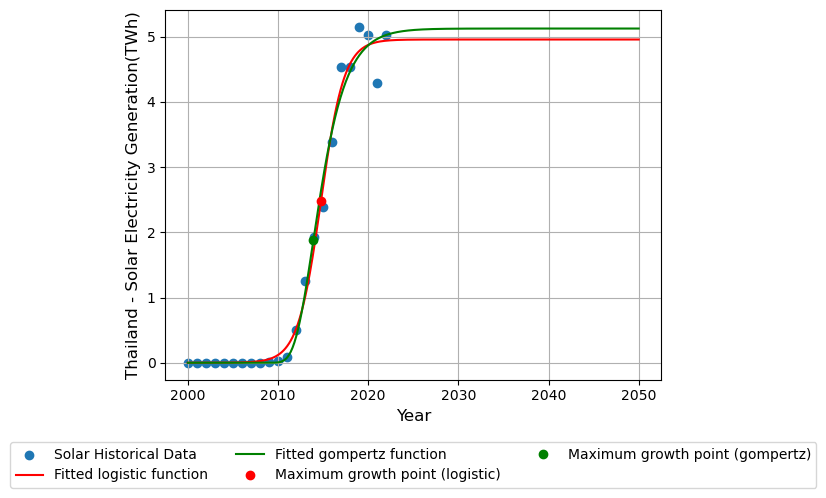

Logistic function parameters:
L_logistic=  16.15162000215956
K_logistic=  0.8090933267864476
T_logistic(inflection point) =  2018.625686299069
Maximum growth rate (logistic) =  3.2670419901344525
2050_logistic =  16.15162000200689

Gompertz function parameters:
L_gompertz=  18.348366241086634
K_gompertz=  0.44985708545387726
T_gompertz(inflection point)=  2018.120766926092
Maximum growth rate (gompertz) =  3.036529352342653
2050_gompertz =  18.348355393399146


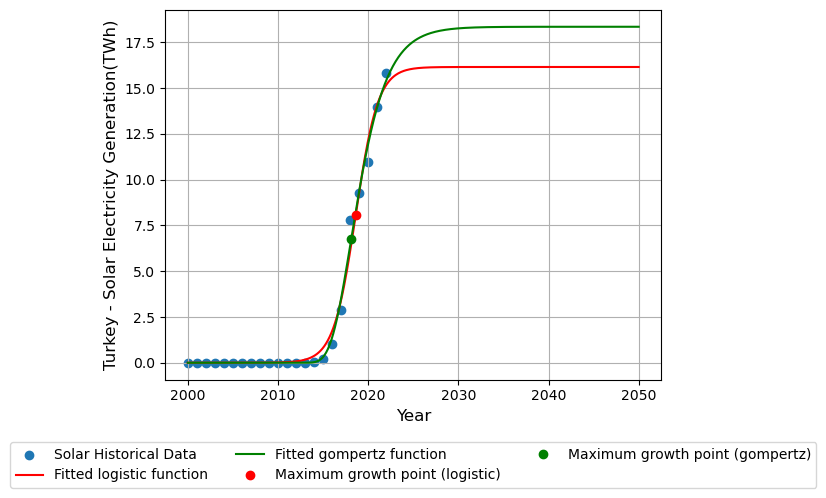

Logistic function parameters:
L_logistic=  6.2256457395388365
K_logistic=  1.769097174774921
T_logistic(inflection point) =  2018.930818409908
Maximum growth rate (logistic) =  2.75344307224192
2050_logistic =  6.2256457395388365

Gompertz function parameters:
L_gompertz=  6.346031639932046
K_gompertz=  1.212846405301142
T_gompertz(inflection point)=  2018.5895835432539
Maximum growth rate (gompertz) =  2.831480379200444
2050_gompertz =  6.346031639932046


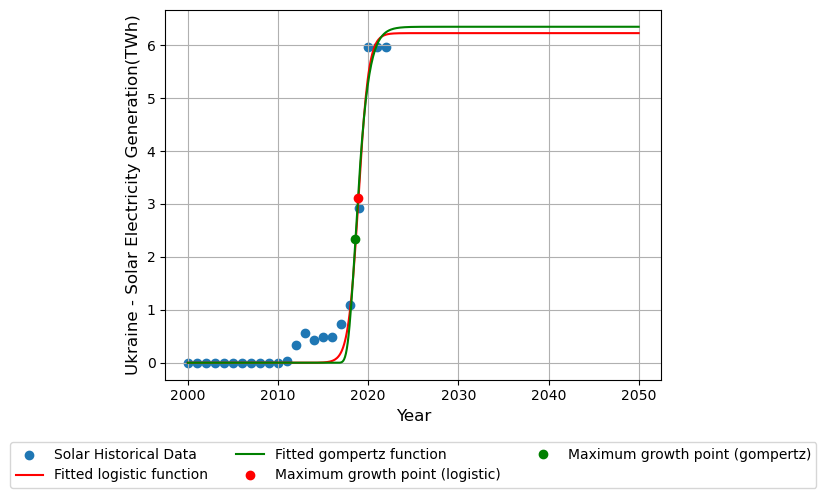

Logistic function parameters:
L_logistic=  7.295223815750671
K_logistic=  1.2074786719258177
T_logistic(inflection point) =  2019.0297793150182
Maximum growth rate (logistic) =  2.202206791111054
2050_logistic =  7.295223815750671

Gompertz function parameters:
L_gompertz=  8.68034029647144
K_gompertz=  0.625497655223006
T_gompertz(inflection point)=  2018.7880018222124
Maximum growth rate (gompertz) =  1.997413382650828
2050_gompertz =  8.680340267644947


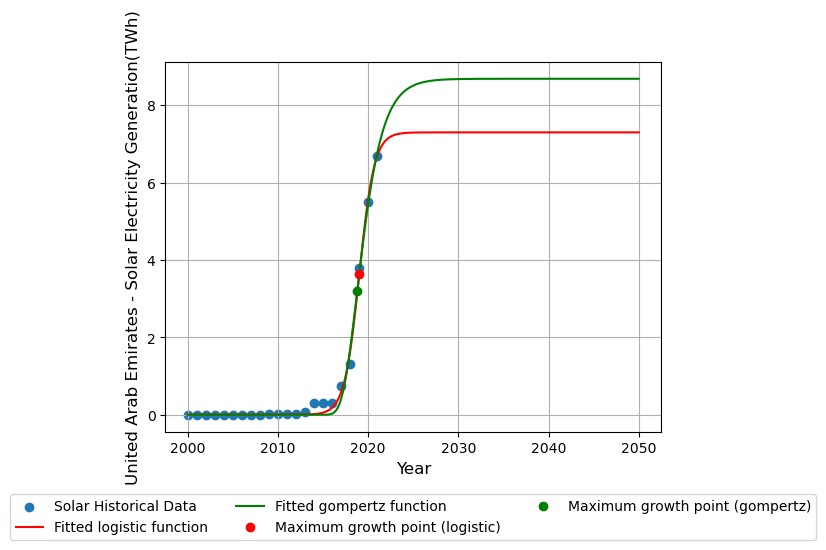

Logistic function parameters:
L_logistic=  13.238789860699868
K_logistic=  0.9508761209958846
T_logistic(inflection point) =  2014.7564470737668
Maximum growth rate (logistic) =  3.147112287355484
2050_logistic =  13.238789860699828

Gompertz function parameters:
L_gompertz=  13.593018951693017
K_gompertz=  0.6149677157626553
T_gompertz(inflection point)=  2014.1102827998377
Maximum growth rate (gompertz) =  3.0752027723997575
2050_gompertz =  13.593018948161227


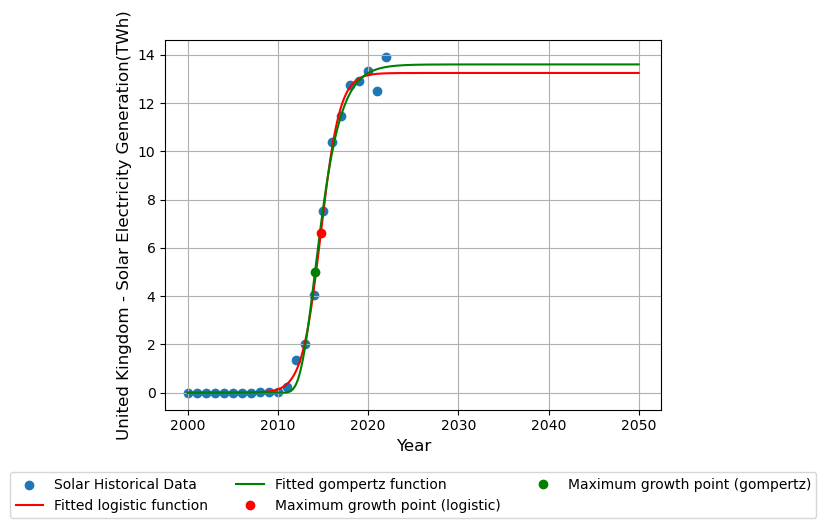

Logistic function parameters:
L_logistic=  319.3283067941267
K_logistic=  0.36377248168967
T_logistic(inflection point) =  2020.6799643138916
Maximum growth rate (logistic) =  29.040712659064948
2050_logistic =  319.32085742346305

Gompertz function parameters:
L_gompertz=  750.347521120803
K_gompertz=  0.1167074619147425
T_gompertz(inflection point)=  2024.4685677736663
Maximum growth rate (gompertz) =  32.215627469970755
2050_gompertz =  713.1764222948025


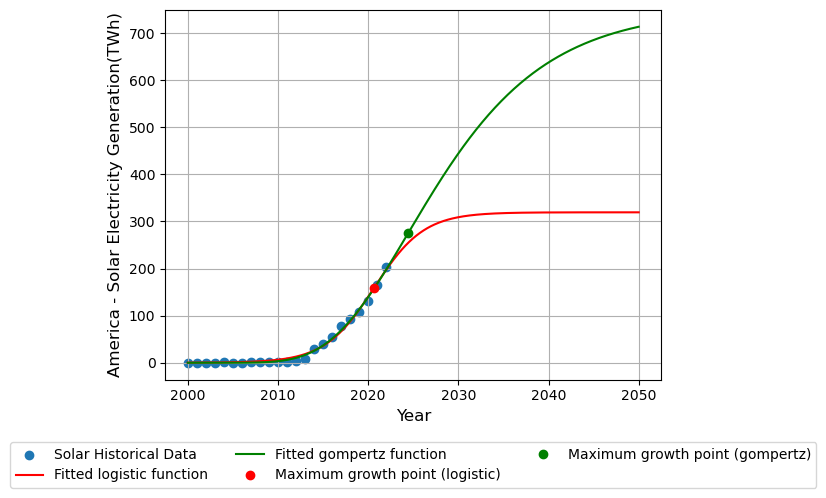

Logistic function parameters:
L_logistic=  0.010000000000000092
K_logistic=  61.85418300544851
T_logistic(inflection point) =  2014.5089836498787
Maximum growth rate (logistic) =  0.1546354575136227
2050_logistic =  0.010000000000000092

Gompertz function parameters:
L_gompertz=  0.010000000000000002
K_gompertz=  37.7653649540247
T_gompertz(inflection point)=  2014.096078375679
Maximum growth rate (gompertz) =  0.13893101354922183
2050_gompertz =  0.010000000000000002


/var/folders/v0/z3mb_1j14l30zgl5tsq_gnq40000gn/T/ipykernel_1100/4149905467.py:12: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-K * (t - T)))


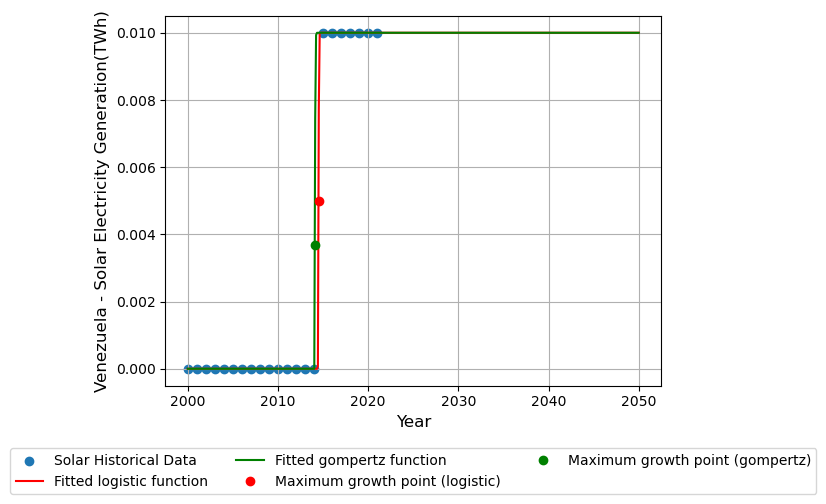

Logistic function parameters:
L_logistic=  28.17533863030984
K_logistic=  1.9049387367547945
T_logistic(inflection point) =  2020.110155796364
Maximum growth rate (logistic) =  13.418073494515248
2050_logistic =  28.17533863030984

Gompertz function parameters:
L_gompertz=  31.46096481321479
K_gompertz=  0.9460580408824734
T_gompertz(inflection point)=  2019.8182692230957
Maximum growth rate (gompertz) =  10.949526433885312
2050_gompertz =  31.460964813202285


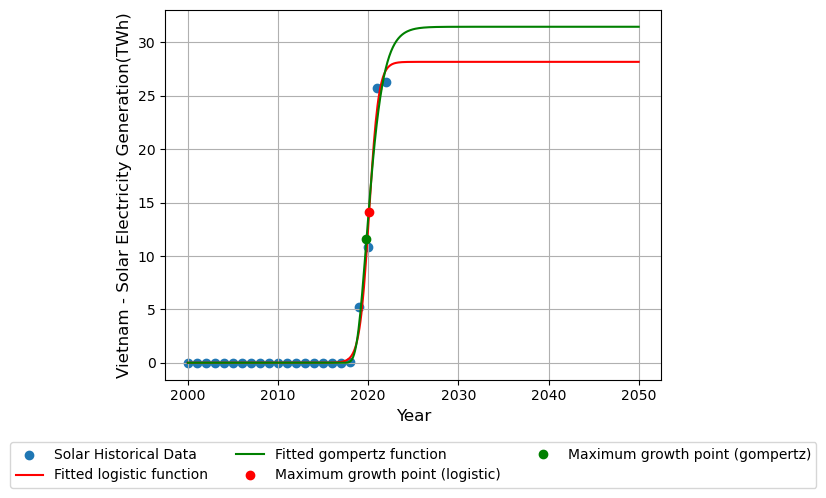

Logistic function parameters:
L_logistic=  2530.4702431054916
K_logistic=  0.3191921923025635
T_logistic(inflection point) =  2021.9979140812648
Maximum growth rate (logistic) =  201.9265861133107
2050_logistic =  2530.138043095167

Gompertz function parameters:
L_gompertz=  15688.602674298087
K_gompertz=  0.07108936103641525
T_gompertz(inflection point)=  2034.9558355470779
Maximum growth rate (gompertz) =  410.29326981238364
2050_gompertz =  11131.15116906865


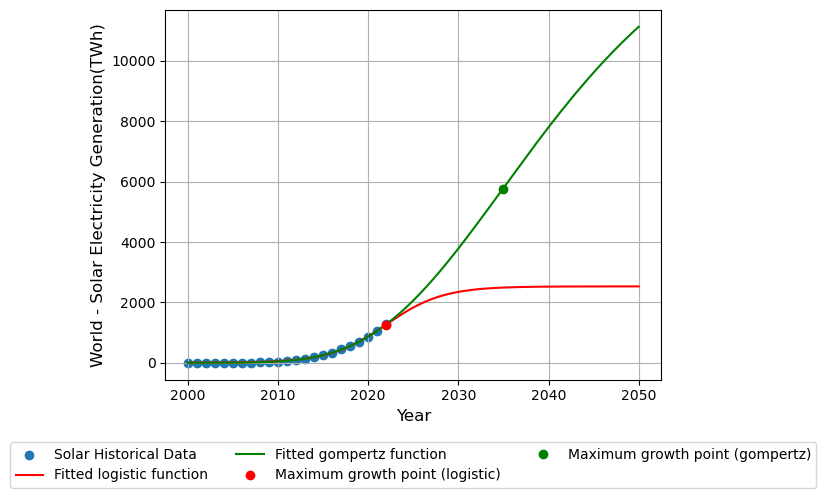

In [22]:
# Solar Power
import pandas as pd

df = pd.read_csv('Data.csv')

filtered_df = df[(df['Variable']=='Solar') & (df['Category']=='Electricity generation') & (df['Unit']=='TWh')]
countries = filtered_df['Area'].unique()

# Countries List
countries_to_analyze = ['United Arab Emirates', 'Argentina', 'Austria', 'Australia', 'Bangladesh', 'Belgium', 'Bulgaria', 'Brazil', 'Belarus', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia', 'Czechia', 'Germany', 'Denmark', 'Algeria', 'Egypt', 'Spain', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India', 'Iraq', 'Iran', 'Italy', 'Japan', 'South Korea', 'Kuwait', 'Kazakhstan', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Philippines', 'Pakistan', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Sweden', 'Syria', 'Thailand', 'Turkey', 'Ukraine', 'America', 'Venezuela', 'Vietnam', 'South Africa','World']

countries = [country for country in countries if country in countries_to_analyze]

for country in countries:
    try:
        analyze_data('Data.csv', 'Solar', 'Electricity generation', 'TWh', country)
    except Exception as e:
        print(f"An error occurred with {country}: {e}")


Logistic function parameters:
L_logistic=  0.014285714267420448
K_logistic=  91.65392073278015
T_logistic(inflection point) =  2014.0964297320988
Maximum growth rate (logistic) =  0.32733543076932503
2050_logistic =  0.014285714267420448

Gompertz function parameters:
L_gompertz=  0.014285714260219445
K_gompertz=  22.606230633709576
T_gompertz(inflection point)=  2014.1026363625665
Maximum growth rate (gompertz) =  0.11880524968114439
2050_gompertz =  0.014285714260219445


/var/folders/v0/z3mb_1j14l30zgl5tsq_gnq40000gn/T/ipykernel_1100/4149905467.py:12: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-K * (t - T)))


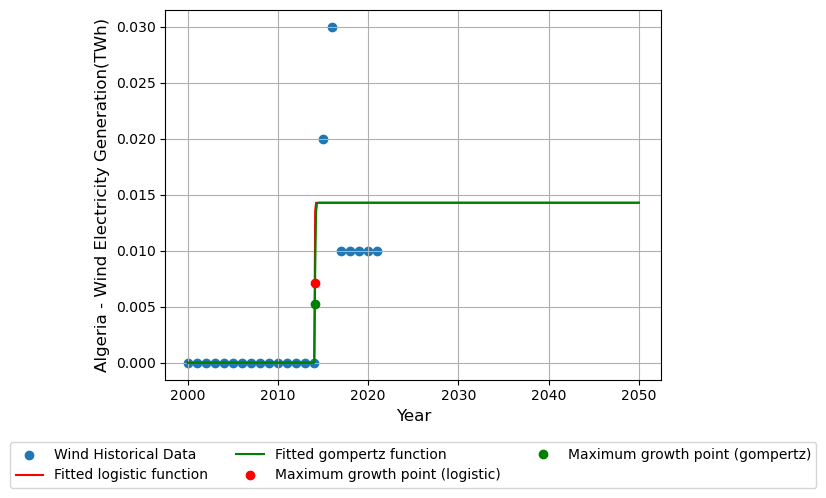

Logistic function parameters:
L_logistic=  14.647936681106474
K_logistic=  1.303319329438738
T_logistic(inflection point) =  2019.552005982168
Maximum growth rate (logistic) =  4.772734753220195
2050_logistic =  14.647936681106474

Gompertz function parameters:
L_gompertz=  15.901561034801238
K_gompertz=  0.7752234292313566
T_gompertz(inflection point)=  2019.171243212713
Maximum growth rate (gompertz) =  4.534946504247679
2050_gompertz =  15.90156103413725


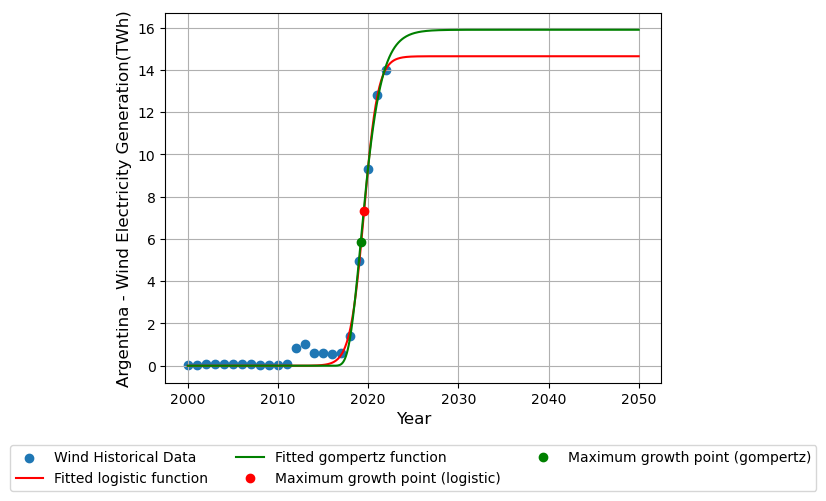

Logistic function parameters:
L_logistic=  90.15355284089381
K_logistic=  0.17790423067041353
T_logistic(inflection point) =  2026.2382538781649
Maximum growth rate (logistic) =  4.009674615090922
2050_logistic =  88.85699477202614

Gompertz function parameters:
L_gompertz=  1067.8906553462157
K_gompertz=  0.03362706536499987
T_gompertz(inflection point)=  2060.2363586354
Maximum growth rate (gompertz) =  13.210561353145867
2050_gompertz =  260.4871332703673


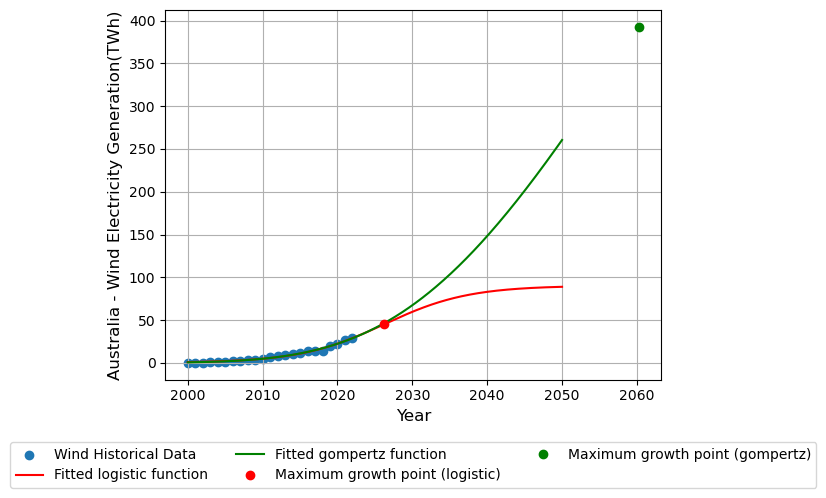

Logistic function parameters:
L_logistic=  8.62545525702896
K_logistic=  0.23696609608265795
T_logistic(inflection point) =  2014.3107646343637
Maximum growth rate (logistic) =  0.510985114798448
2050_logistic =  8.623623781593594

Gompertz function parameters:
L_gompertz=  12.962163992044491
K_gompertz=  0.09491443110278411
T_gompertz(inflection point)=  2015.399103119373
Maximum growth rate (gompertz) =  0.45260075989373527
2050_gompertz =  12.485416345937107


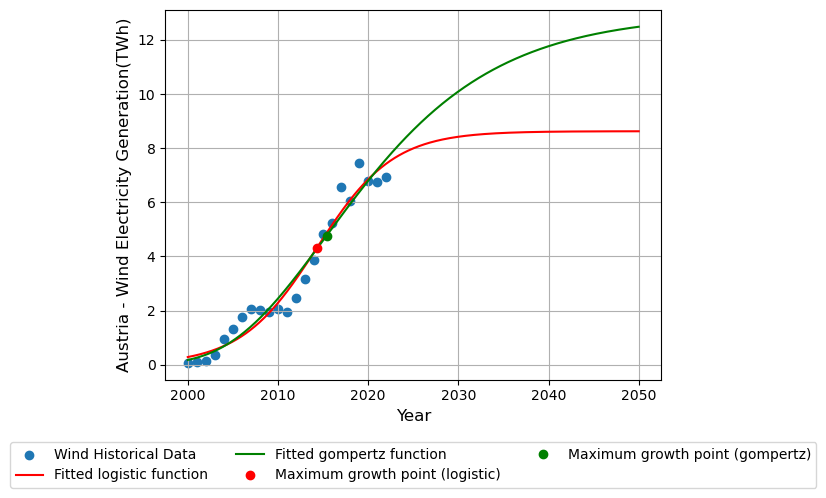

Logistic function parameters:
L_logistic=  0.010000000000000812
K_logistic=  56.1554576602651
T_logistic(inflection point) =  2014.5003195273725
Maximum growth rate (logistic) =  0.14038864415067415
2050_logistic =  0.010000000000000812

Gompertz function parameters:
L_gompertz=  0.010000000000000115
K_gompertz=  33.477277654340405
T_gompertz(inflection point)=  2014.1034222442315
Maximum growth rate (gompertz) =  0.12315602195420103
2050_gompertz =  0.010000000000000115


/var/folders/v0/z3mb_1j14l30zgl5tsq_gnq40000gn/T/ipykernel_1100/4149905467.py:12: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-K * (t - T)))


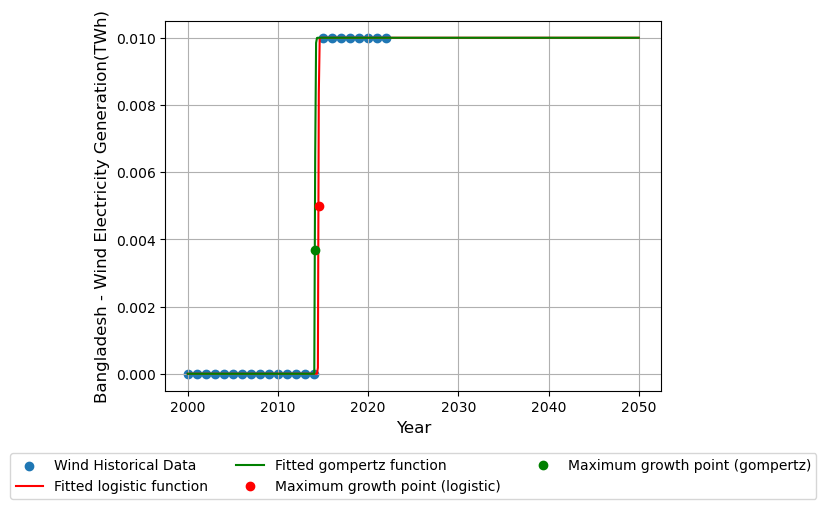

Logistic function parameters:
L_logistic=  0.21369079589175738
K_logistic=  0.6813244262272964
T_logistic(inflection point) =  2017.3417384789611
Maximum growth rate (logistic) =  0.036398189725251474
2050_logistic =  0.21369079584537476

Gompertz function parameters:
L_gompertz=  0.247092311457549
K_gompertz=  0.3658579660053323
T_gompertz(inflection point)=  2016.7837654343246
Maximum growth rate (gompertz) =  0.033256555497286976
2050_gompertz =  0.2470910079084483


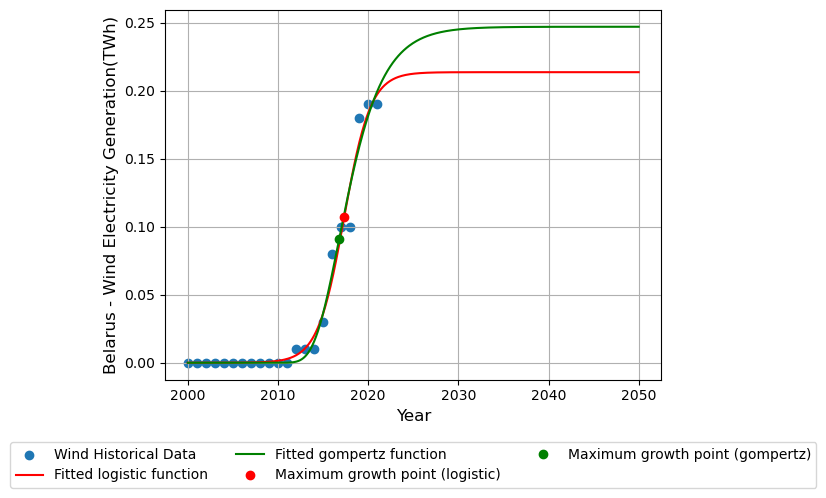

Logistic function parameters:
L_logistic=  16.606704875706924
K_logistic=  0.29446261708032023
T_logistic(inflection point) =  2017.8151211956965
Maximum growth rate (logistic) =  1.2225134446952939
2050_logistic =  16.605433319403428

Gompertz function parameters:
L_gompertz=  29.31885828713427
K_gompertz=  0.10825573346901421
T_gompertz(inflection point)=  2020.0545198844077
Maximum growth rate (gompertz) =  1.1676252532457474
2050_gompertz =  28.1947642793002


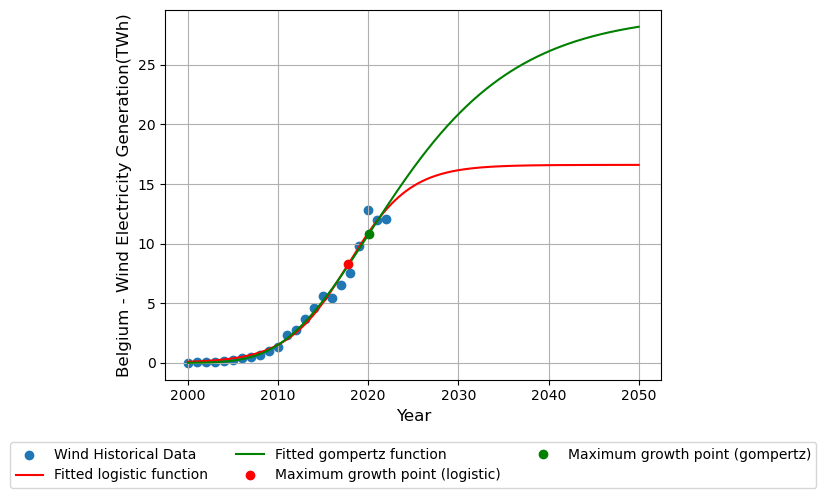

Logistic function parameters:
L_logistic=  84.72988276668924
K_logistic=  0.457452892996319
T_logistic(inflection point) =  2017.4385625615403
Maximum growth rate (logistic) =  9.689982498715237
2050_logistic =  84.72985398743444

Gompertz function parameters:
L_gompertz=  107.80557733078544
K_gompertz=  0.22187330190970397
T_gompertz(inflection point)=  2017.1063038526179
Maximum growth rate (gompertz) =  8.799374353402765
2050_gompertz =  107.73264636278125


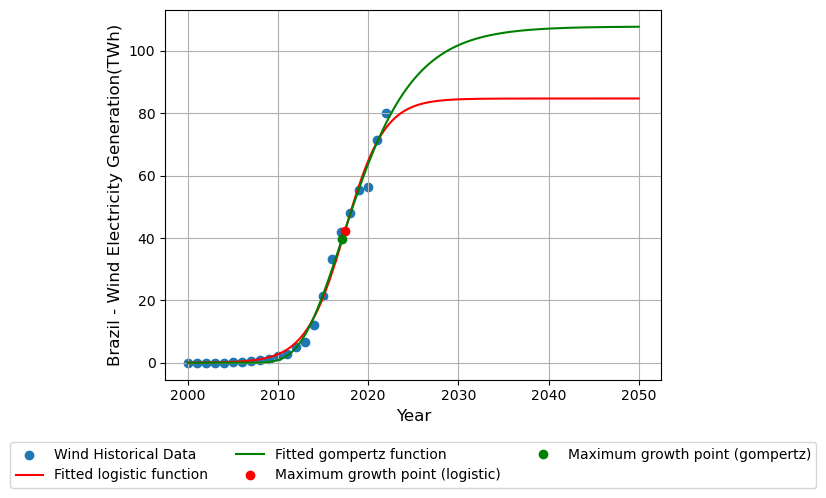

Logistic function parameters:
L_logistic=  1.418094454442921
K_logistic=  1.0170645431628789
T_logistic(inflection point) =  2010.3330023789274
Maximum growth rate (logistic) =  0.36057339711745034
2050_logistic =  1.418094454442921

Gompertz function parameters:
L_gompertz=  1.4288325563668884
K_gompertz=  0.711733273360333
T_gompertz(inflection point)=  2009.703494482619
Maximum growth rate (gompertz) =  0.37411414143297683
2050_gompertz =  1.4288325563663882


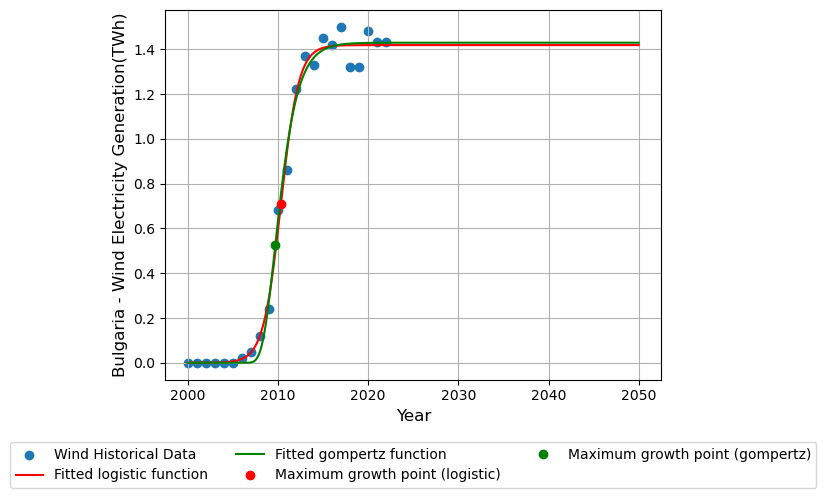

Logistic function parameters:
L_logistic=  37.5277589876139
K_logistic=  0.4202182917796639
T_logistic(inflection point) =  2013.192400021428
Maximum growth rate (logistic) =  3.9424626940235106
2050_logistic =  37.5277517927712

Gompertz function parameters:
L_gompertz=  41.905848041890515
K_gompertz=  0.22932068635973515
T_gompertz(inflection point)=  2012.1086606585764
Maximum growth rate (gompertz) =  3.535276487832315
2050_gompertz =  41.89879239317485


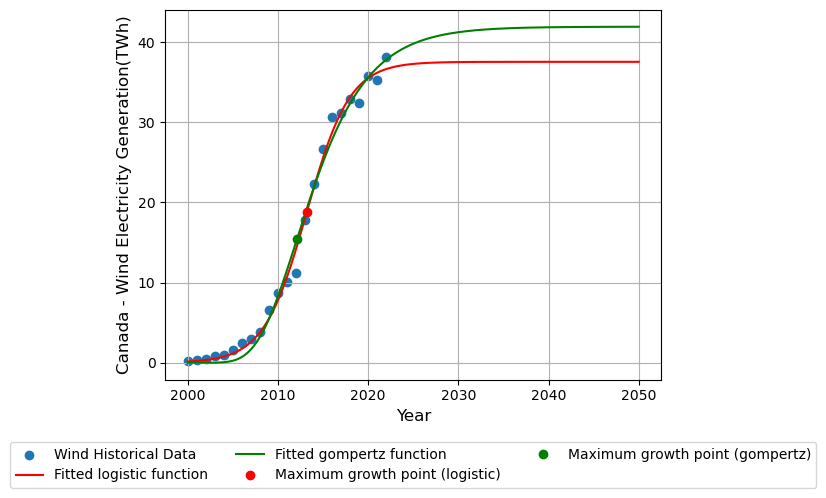

Logistic function parameters:
L_logistic=  15.327723056137387
K_logistic=  0.3289455597182846
T_logistic(inflection point) =  2021.2857748741499
Maximum growth rate (logistic) =  1.260496609976992
2050_logistic =  15.326511479486847

Gompertz function parameters:
L_gompertz=  50.0811875267888
K_gompertz=  0.09135072476565946
T_gompertz(inflection point)=  2028.211853090385
Maximum growth rate (gompertz) =  1.683031071244933
2050_gompertz =  43.68477427650853


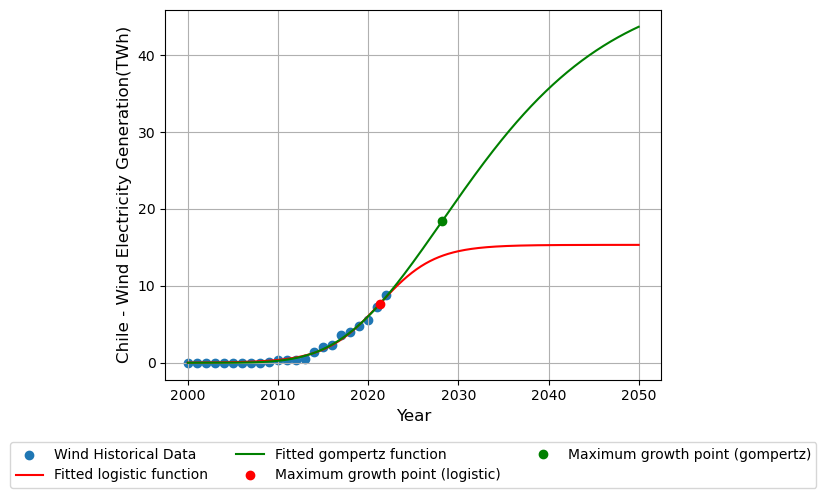

Logistic function parameters:
L_logistic=  7960.396854064592
K_logistic=  0.22364240250629702
T_logistic(inflection point) =  2031.8514288914262
Maximum growth rate (logistic) =  445.07056933664353
2050_logistic =  7825.255456949089

Gompertz function parameters:
L_gompertz=  4748600.638504658
K_gompertz=  0.022160205750543328
T_gompertz(inflection point)=  2119.6680022210044
Maximum growth rate (gompertz) =  38711.94151935232
2050_gompertz =  43947.14584209318


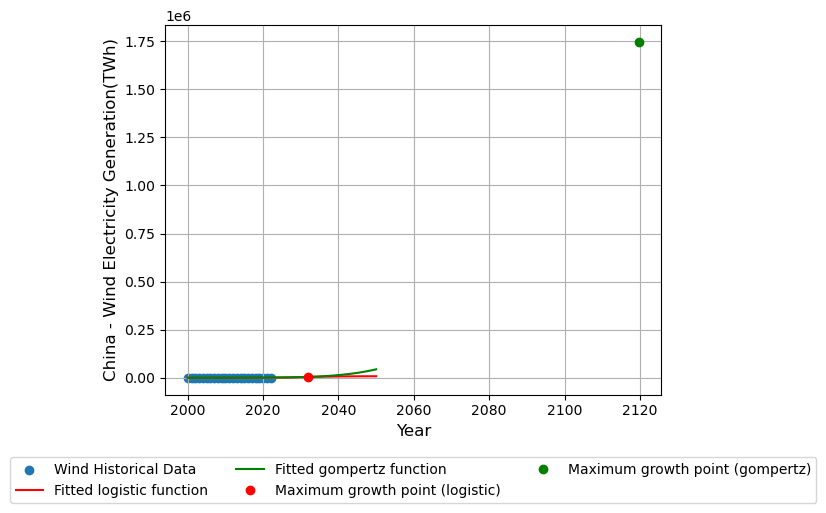

Logistic function parameters:
L_logistic=  0.049473684210526316
K_logistic=  52.24885188537431
T_logistic(inflection point) =  2003.1826101669863
Maximum growth rate (logistic) =  0.6462357996348927
2050_logistic =  0.049473684210526316

Gompertz function parameters:
L_gompertz=  0.04947368421052665
K_gompertz=  36.71772518901691
T_gompertz(inflection point)=  2003.0614451318372
Maximum growth rate (gompertz) =  0.6682754973792048
2050_gompertz =  0.04947368421052665


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


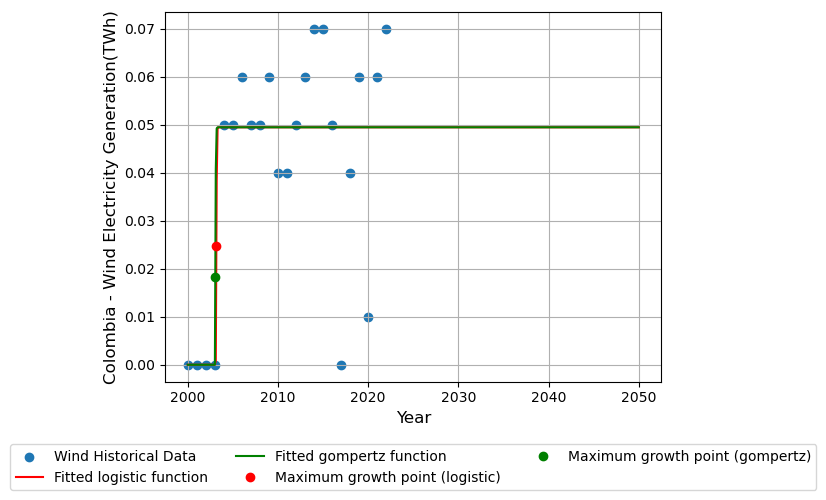

Logistic function parameters:
L_logistic=  0.6422859225341996
K_logistic=  0.4102410288204916
T_logistic(inflection point) =  2010.1666083339474
Maximum growth rate (logistic) =  0.06587300941433716
2050_logistic =  0.6422858711540211

Gompertz function parameters:
L_gompertz=  0.674215989227329
K_gompertz=  0.25897269759551783
T_gompertz(inflection point)=  2008.7765529175595
Maximum growth rate (gompertz) =  0.0642330503276815
2050_gompertz =  0.6742004160979551


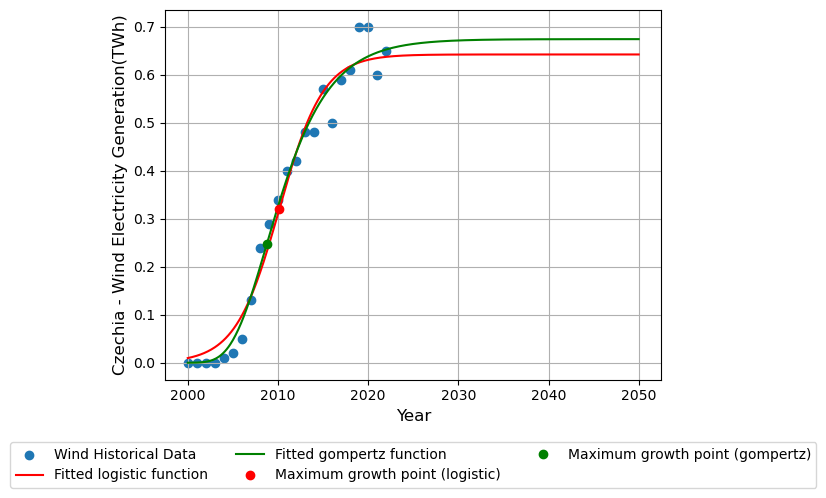

Logistic function parameters:
L_logistic=  32.84851733126644
K_logistic=  0.09929731656344232
T_logistic(inflection point) =  2019.8776138123892
Maximum growth rate (logistic) =  0.8154424060206213
2050_logistic =  31.277345197302846

Gompertz function parameters:
L_gompertz=  99.9623583126695
K_gompertz=  0.029148139592560875
T_gompertz(inflection point)=  2040.1714071052563
Maximum growth rate (gompertz) =  1.0718964985875004
2050_gompertz =  47.17648195628205


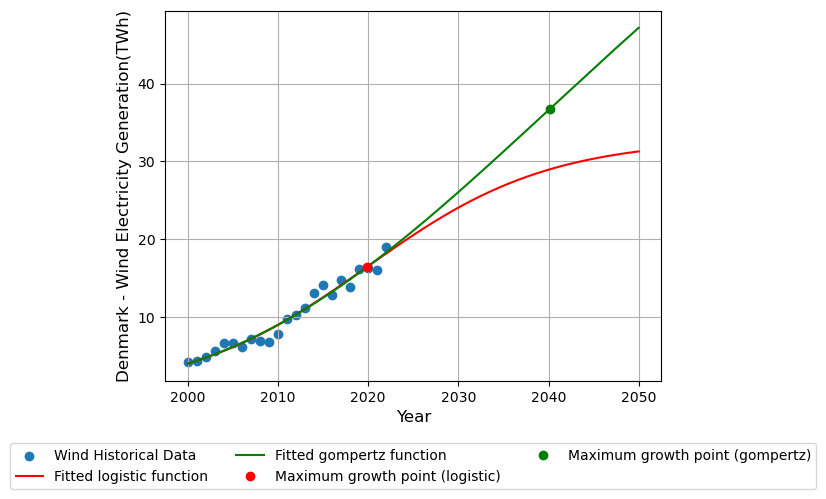

Logistic function parameters:
L_logistic=  11.06342032112944
K_logistic=  0.1591186903005032
T_logistic(inflection point) =  2024.0280395515356
Maximum growth rate (logistic) =  0.4400992379355223
2050_logistic =  10.888756742953891

Gompertz function parameters:
L_gompertz=  296.3463599858116
K_gompertz=  0.025027893344939454
T_gompertz(inflection point)=  2078.819733614403
Maximum growth rate (gompertz) =  2.728534257645564
2050_gompertz =  37.8802139084517


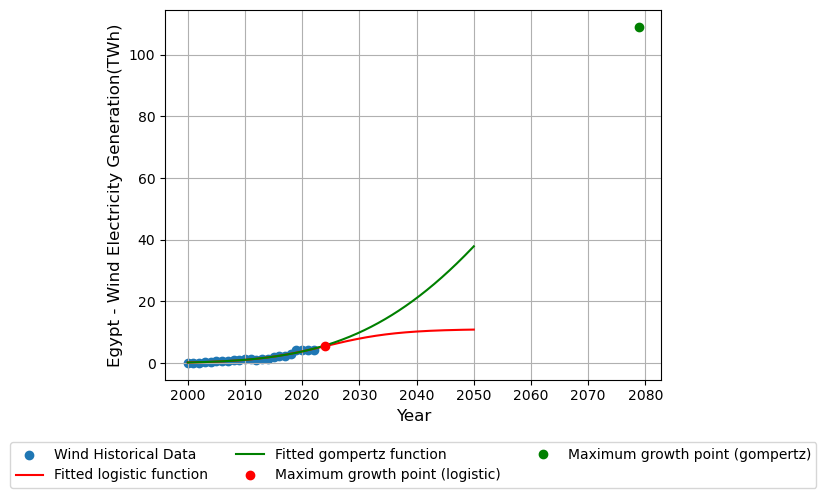

Logistic function parameters:
L_logistic=  18.8187490105188
K_logistic=  0.3463932962276793
T_logistic(inflection point) =  2020.8040262190314
Maximum growth rate (logistic) =  1.6296721251587463
2050_logistic =  18.817986181368664

Gompertz function parameters:
L_gompertz=  47.226965635345955
K_gompertz=  0.10854095701307083
T_gompertz(inflection point)=  2025.2515772715437
Maximum growth rate (gompertz) =  1.8857721054588914
2050_gompertz =  44.11619061517894


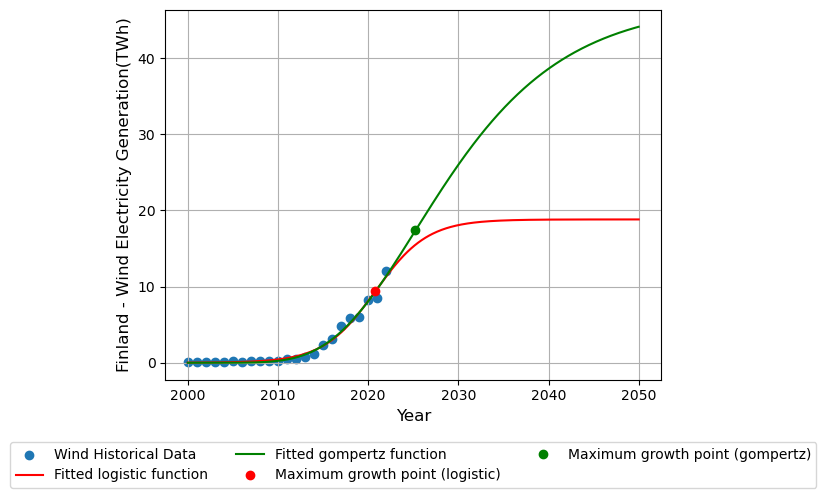

Logistic function parameters:
L_logistic=  48.319872416718965
K_logistic=  0.25485764986887954
T_logistic(inflection point) =  2016.0076870309524
Maximum growth rate (logistic) =  3.078672281522273
2050_logistic =  48.31152272698915

Gompertz function parameters:
L_gompertz=  71.05685163912035
K_gompertz=  0.10742419882844283
T_gompertz(inflection point)=  2016.734563063625
Maximum growth rate (gompertz) =  2.8081066792589326
2050_gompertz =  69.0909094555371


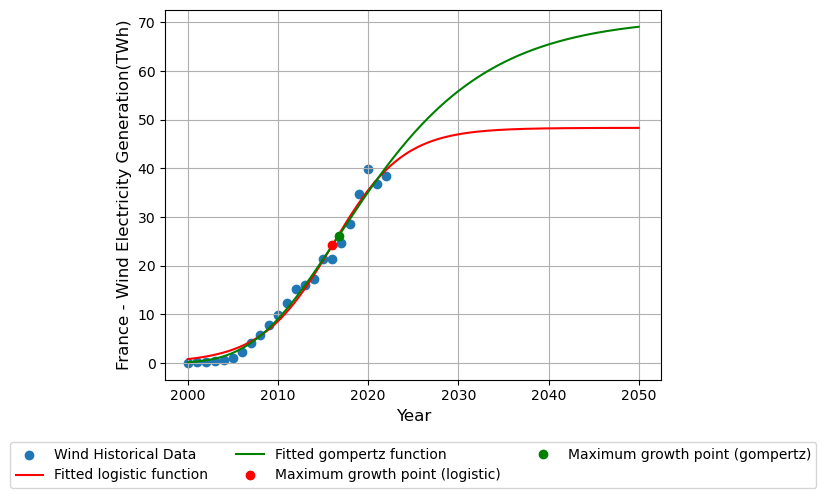

Logistic function parameters:
L_logistic=  210.6659911984741
K_logistic=  0.15550466600253735
T_logistic(inflection point) =  2018.286211673946
Maximum growth rate (logistic) =  8.189886149853047
2050_logistic =  209.15699736659565

Gompertz function parameters:
L_gompertz=  629.0087042710197
K_gompertz=  0.04449942592921803
T_gompertz(inflection point)=  2031.4968380670502
Maximum growth rate (gompertz) =  10.297139152936573
2050_gompertz =  405.5319342309066


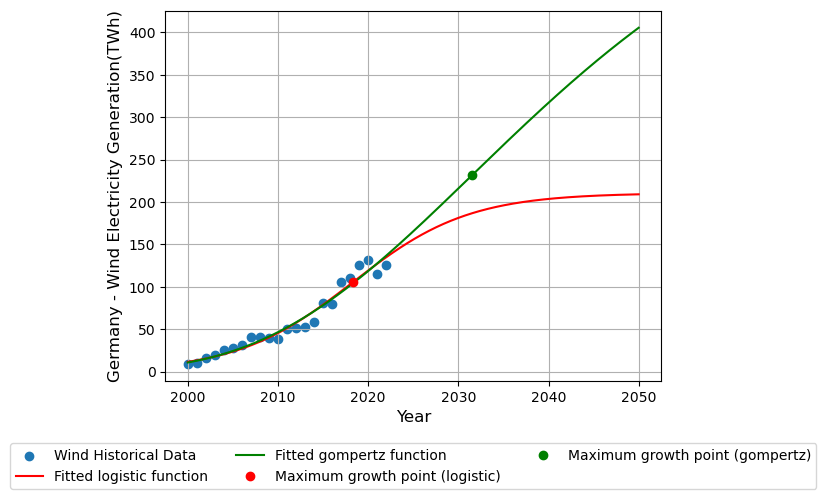

An error occurred with Greece: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  0.6869136383201138
K_logistic=  1.1063153828145762
T_logistic(inflection point) =  2008.8765364646345
Maximum growth rate (logistic) =  0.1899857811846675
2050_logistic =  0.6869136383201138

Gompertz function parameters:
L_gompertz=  0.6892647996811369
K_gompertz=  0.7827078269672062
T_gompertz(inflection point)=  2008.2671077085274
Maximum growth rate (gompertz) =  0.19846836627283793
2050_gompertz =  0.6892647996811323


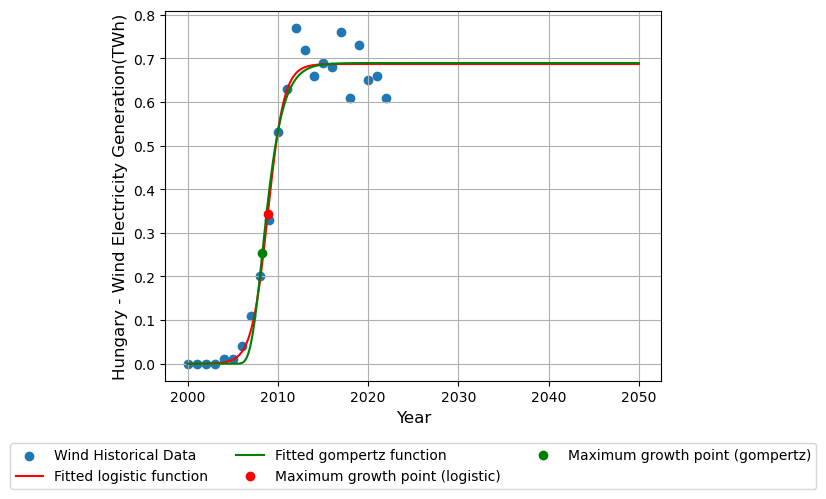

Logistic function parameters:
L_logistic=  88.50300320019245
K_logistic=  0.22885206112688392
T_logistic(inflection point) =  2015.8113818217842
Maximum growth rate (logistic) =  5.063523674570812
2050_logistic =  88.46761932746819

Gompertz function parameters:
L_gompertz=  145.26156485595294
K_gompertz=  0.08851050418398411
T_gompertz(inflection point)=  2017.870035614823
Maximum growth rate (gompertz) =  4.729890112697936
2050_gompertz =  137.0484116750955


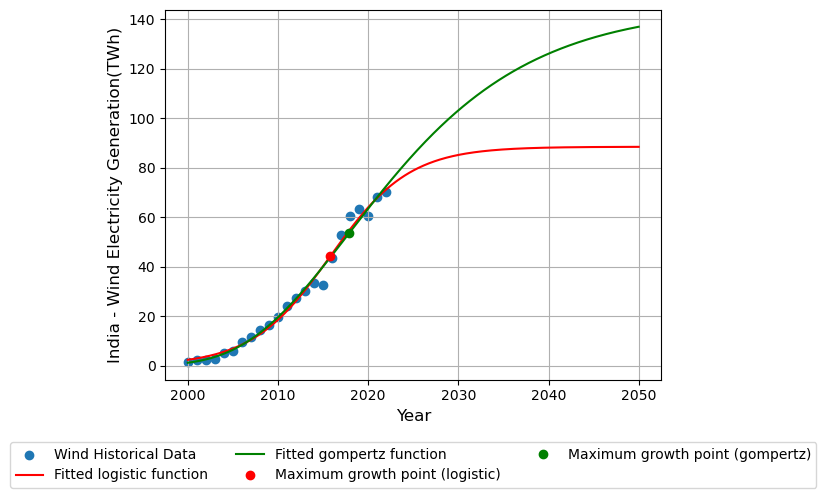

Logistic function parameters:
L_logistic=  0.4375000002511722
K_logistic=  19.872106750932915
T_logistic(inflection point) =  2018.0133030073082
Maximum growth rate (logistic) =  2.173511677131118
2050_logistic =  0.4375000002511722

Gompertz function parameters:
L_gompertz=  0.4375000000598199
K_gompertz=  20.975426716741005
T_gompertz(inflection point)=  2017.9913492654334
Maximum growth rate (gompertz) =  3.3759373637247556
2050_gompertz =  0.4375000000598199


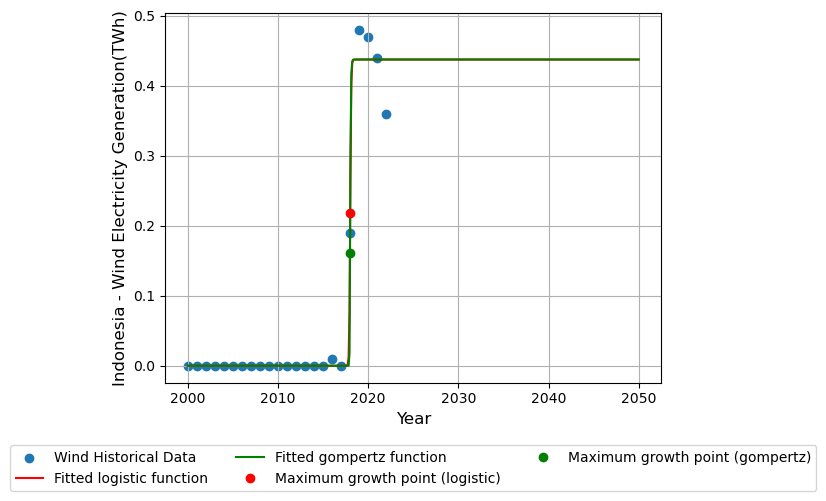

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2010.5
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2010.5
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


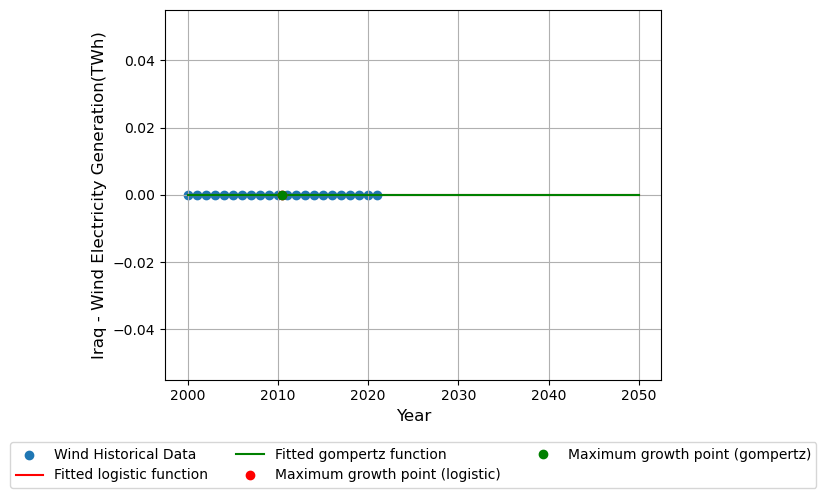

Logistic function parameters:
L_logistic=  15.069759431979653
K_logistic=  0.2113111589713504
T_logistic(inflection point) =  2016.6067896165168
Maximum growth rate (logistic) =  0.7961020827477648
2050_logistic =  15.056781818928922

Gompertz function parameters:
L_gompertz=  27.100333754395354
K_gompertz=  0.07767780331956615
T_gompertz(inflection point)=  2019.904311046118
Maximum growth rate (gompertz) =  0.7744209497445192
2050_gompertz =  24.6063137372418


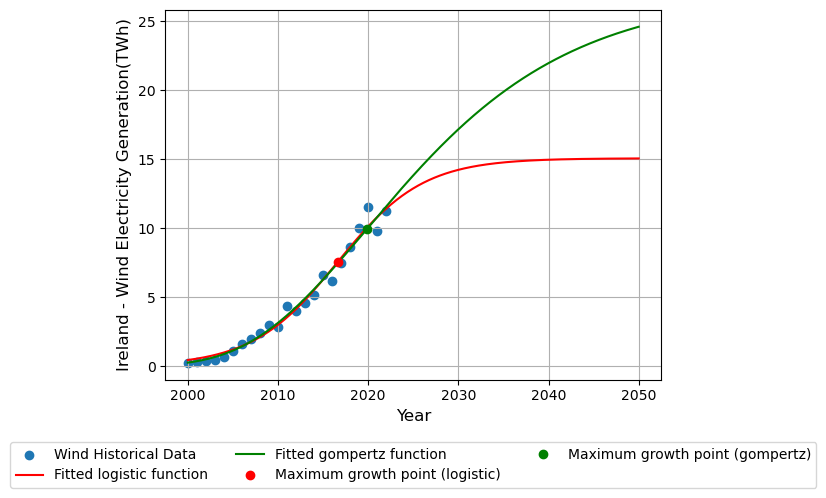

Logistic function parameters:
L_logistic=  0.1904945155840596
K_logistic=  3.6741174559244314
T_logistic(inflection point) =  2016.2746333709485
Maximum growth rate (logistic) =  0.1749748062413155
2050_logistic =  0.1904945155840596

Gompertz function parameters:
L_gompertz=  0.19036674820426627
K_gompertz=  3.0808608882420927
T_gompertz(inflection point)=  2016.0938709762759
Maximum growth rate (gompertz) =  0.21575888961330744
2050_gompertz =  0.19036674820426627


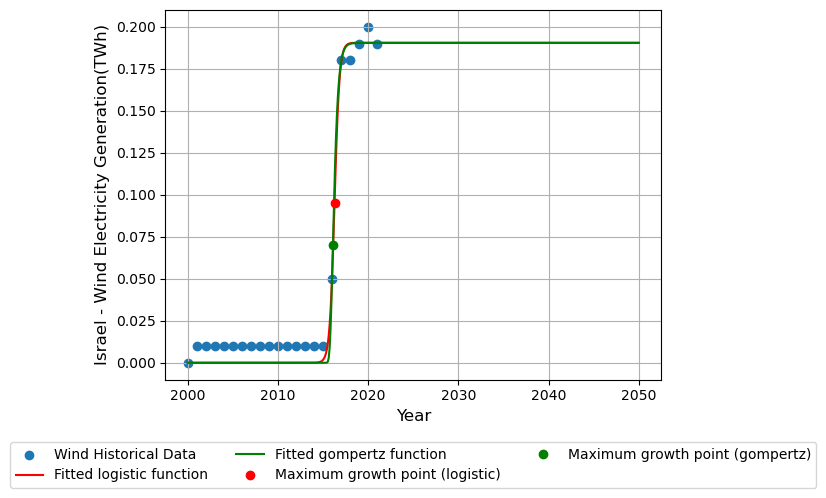

Logistic function parameters:
L_logistic=  20.364461513080048
K_logistic=  0.3446779244699813
T_logistic(inflection point) =  2010.8669805819338
Maximum growth rate (logistic) =  1.7547950818193114
2050_logistic =  20.364433265365353

Gompertz function parameters:
L_gompertz=  22.34758929290131
K_gompertz=  0.1973875762725798
T_gompertz(inflection point)=  2009.4817441803393
Maximum growth rate (gompertz) =  1.6227664254230239
2050_gompertz =  22.3400772659805


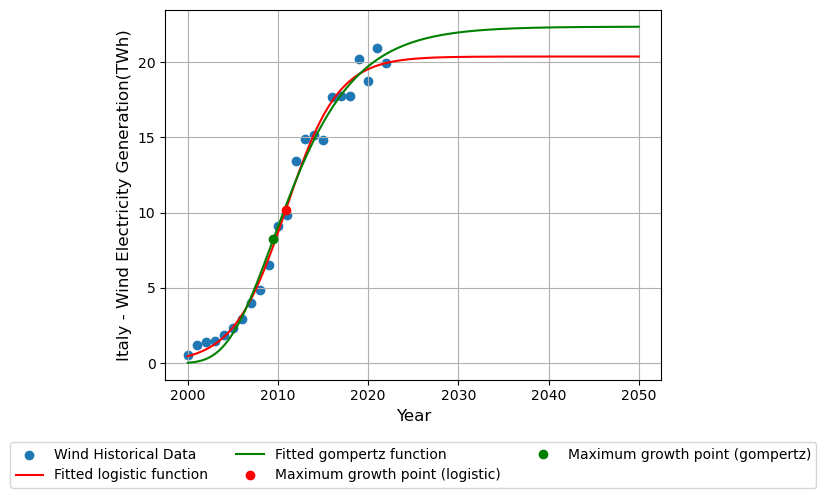

Logistic function parameters:
L_logistic=  10.48849256733005
K_logistic=  0.19475613581354126
T_logistic(inflection point) =  2013.3805009733483
Maximum growth rate (logistic) =  0.5106745707305623
2050_logistic =  10.480116630256795

Gompertz function parameters:
L_gompertz=  13.258591878986465
K_gompertz=  0.09738161346019872
T_gompertz(inflection point)=  2012.4921564770093
Maximum growth rate (gompertz) =  0.4749849908380987
2050_gompertz =  12.919289190512705


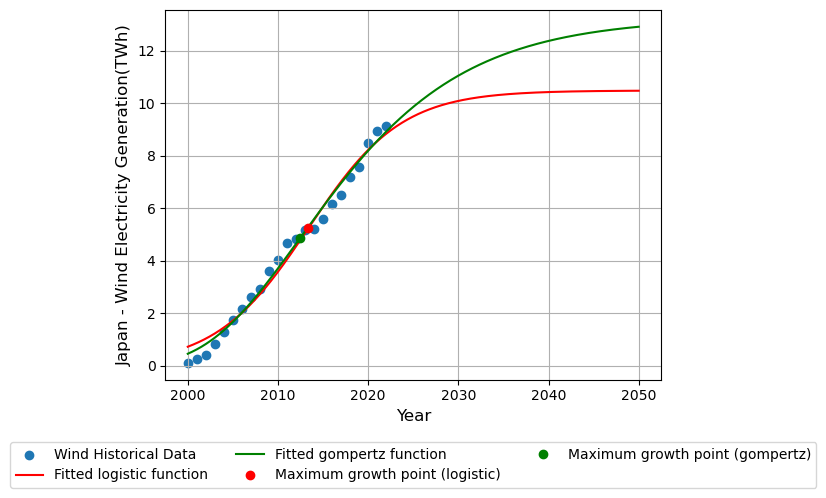

Logistic function parameters:
L_logistic=  7.120612159427629
K_logistic=  0.4871099461030683
T_logistic(inflection point) =  2023.5243298907503
Maximum growth rate (logistic) =  0.8671302512999113
2050_logistic =  7.120594310569952

Gompertz function parameters:
L_gompertz=  1392.4139204742032
K_gompertz=  0.055835910421445534
T_gompertz(inflection point)=  2055.2579365352462
Maximum growth rate (gompertz) =  28.601412156459467
2050_gompertz =  364.152026703117


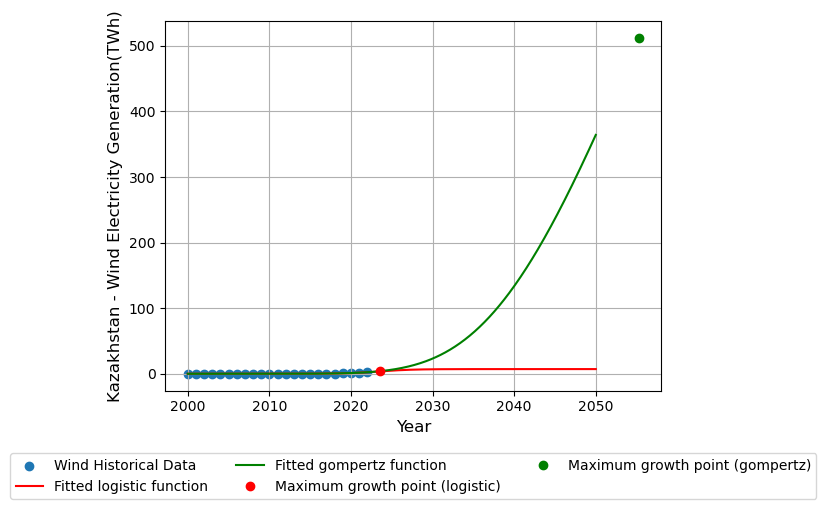

Logistic function parameters:
L_logistic=  0.03585068317347115
K_logistic=  0.9960491281341208
T_logistic(inflection point) =  2015.8654114827095
Maximum growth rate (logistic) =  0.008927260429487133
2050_logistic =  0.035850683173471086

Gompertz function parameters:
L_gompertz=  0.03794778903848216
K_gompertz=  0.4894853704314545
T_gompertz(inflection point)=  2014.97679925627
Maximum growth rate (gompertz) =  0.006833319260750076
2050_gompertz =  0.03794778767726755


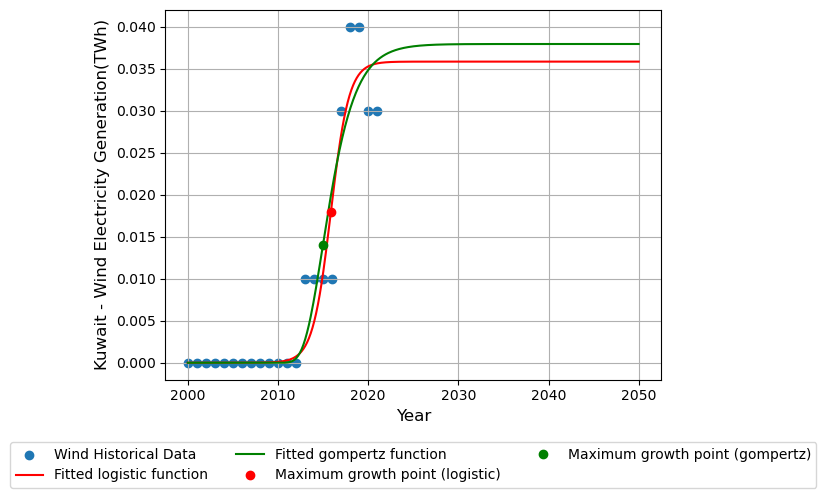

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2011.0
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2011.0
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


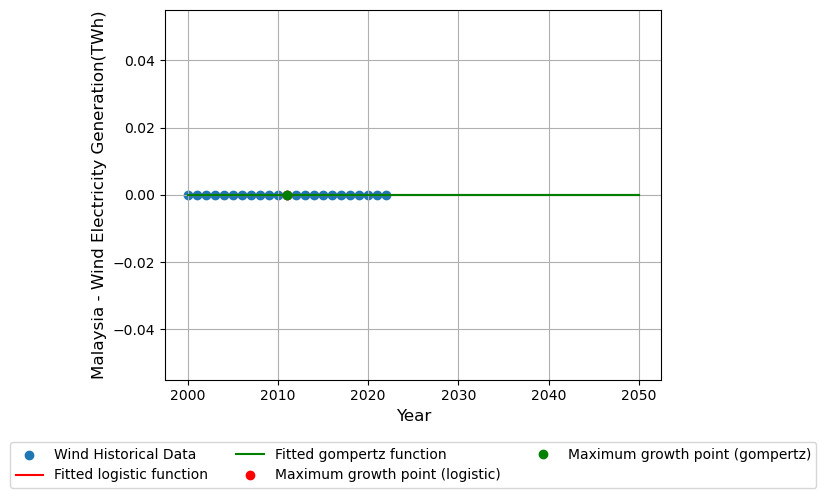

Logistic function parameters:
L_logistic=  25.34781194106403
K_logistic=  0.3706203826171612
T_logistic(inflection point) =  2017.4078116266696
Maximum growth rate (logistic) =  2.3486039400262495
2050_logistic =  25.347668077127246

Gompertz function parameters:
L_gompertz=  36.32536402592079
K_gompertz=  0.15762680146594724
T_gompertz(inflection point)=  2017.7509737238834
Maximum growth rate (gompertz) =  2.1064228453228417
2050_gompertz =  36.100866974327786


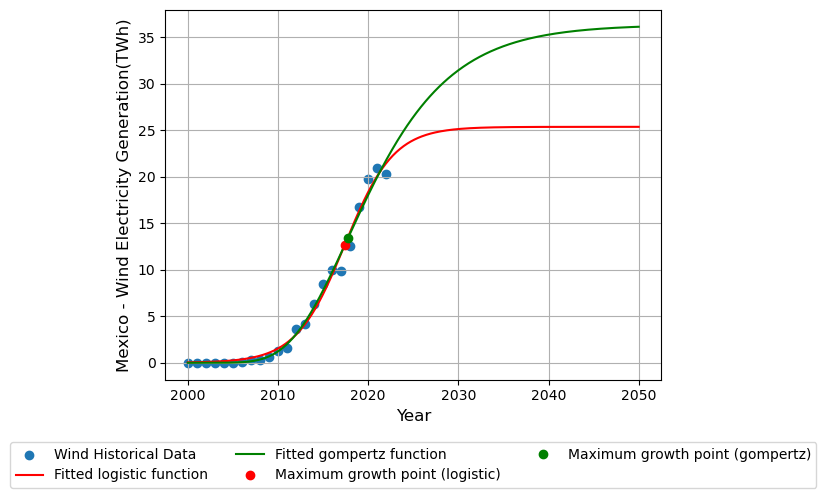

An error occurred with Netherlands: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  2.4676018401378275
K_logistic=  0.3860498131385827
T_logistic(inflection point) =  2008.4131198389425
Maximum growth rate (logistic) =  0.2381543073214078
2050_logistic =  2.4676015772032676

Gompertz function parameters:
L_gompertz=  2.634526045675744
K_gompertz=  0.2260102212114734
T_gompertz(inflection point)=  2007.031260922796
Maximum growth rate (gompertz) =  0.21904638736745843
2050_gompertz =  2.634366423545528


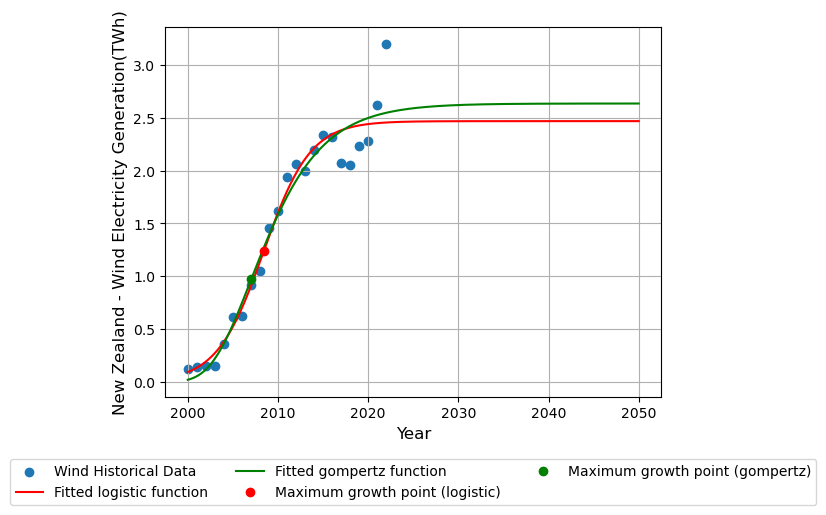

An error occurred with Norway: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  3.5320021242228727
K_logistic=  0.6887607015978565
T_logistic(inflection point) =  2016.428700178561
Maximum growth rate (logistic) =  0.6081760652812164
2050_logistic =  3.5320021239022403

Gompertz function parameters:
L_gompertz=  4.078090795263169
K_gompertz=  0.3443391003549084
T_gompertz(inflection point)=  2015.874260355915
Maximum growth rate (gompertz) =  0.5165932762765071
2050_gompertz =  4.078058648586842


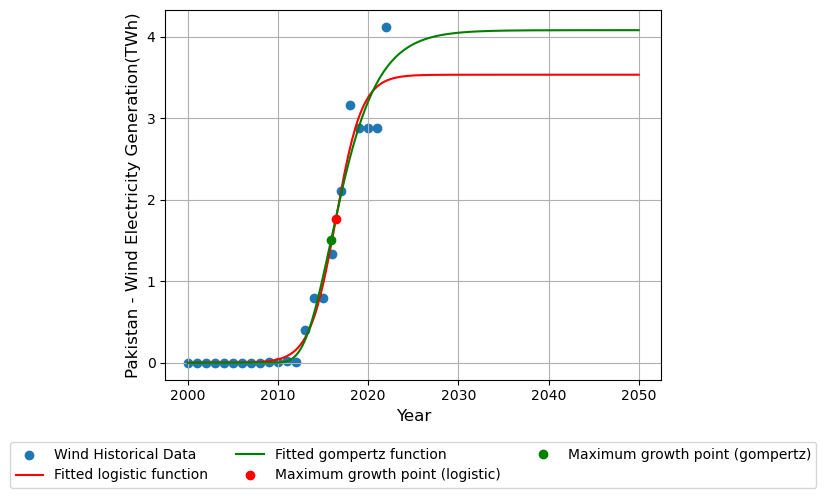

Logistic function parameters:
L_logistic=  1.8966578838168704
K_logistic=  0.7606870140506632
T_logistic(inflection point) =  2016.21499933018
Maximum growth rate (logistic) =  0.3606907555790762
2050_logistic =  1.8966578838037875

Gompertz function parameters:
L_gompertz=  2.0054828002384233
K_gompertz=  0.4687870165059098
T_gompertz(inflection point)=  2015.4676784879941
Maximum growth rate (gompertz) =  0.3458597591812775
2050_gompertz =  2.0054826132874055


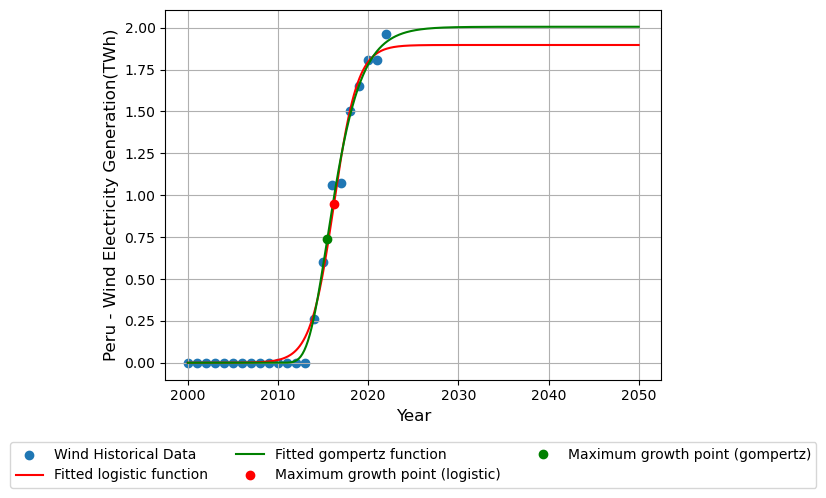

Logistic function parameters:
L_logistic=  17.94329119146786
K_logistic=  0.4474546490322182
T_logistic(inflection point) =  2014.4454589841325
Maximum growth rate (logistic) =  2.007202265640286
2050_logistic =  17.943288979943446

Gompertz function parameters:
L_gompertz=  20.503657933309714
K_gompertz=  0.2397019646951729
T_gompertz(inflection point)=  2013.5734236423039
Maximum growth rate (gompertz) =  1.808041770576165
2050_gompertz =  20.500348569535436


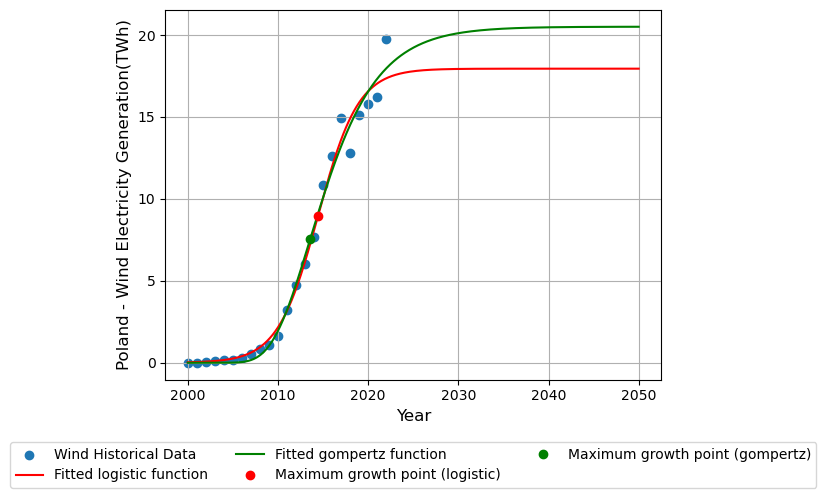

Logistic function parameters:
L_logistic=  12.850137908215101
K_logistic=  0.4906147675009401
T_logistic(inflection point) =  2008.543237495697
Maximum growth rate (logistic) =  1.5761168555484921
2050_logistic =  12.850137889349872

Gompertz function parameters:
L_gompertz=  13.233506425531095
K_gompertz=  0.3175065105804122
T_gompertz(inflection point)=  2007.3036681944195
Maximum growth rate (gompertz) =  1.545728041854931
2050_gompertz =  13.233489277239334


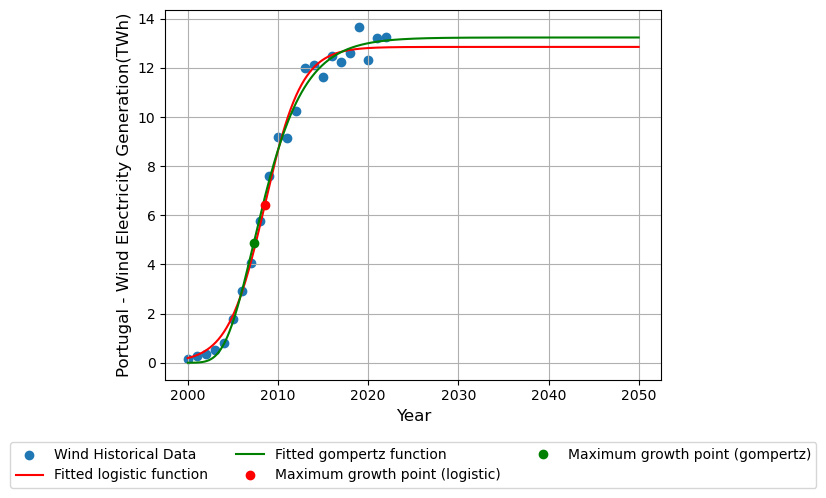

Logistic function parameters:
L_logistic=  6.887069368492153
K_logistic=  1.218551877094938
T_logistic(inflection point) =  2012.355423522157
Maximum growth rate (logistic) =  2.0980628266647905
2050_logistic =  6.887069368492153

Gompertz function parameters:
L_gompertz=  6.94326761455821
K_gompertz=  0.821808680682874
T_gompertz(inflection point)=  2011.7915810692348
Maximum growth rate (gompertz) =  2.099133922836426
2050_gompertz =  6.943267614558049


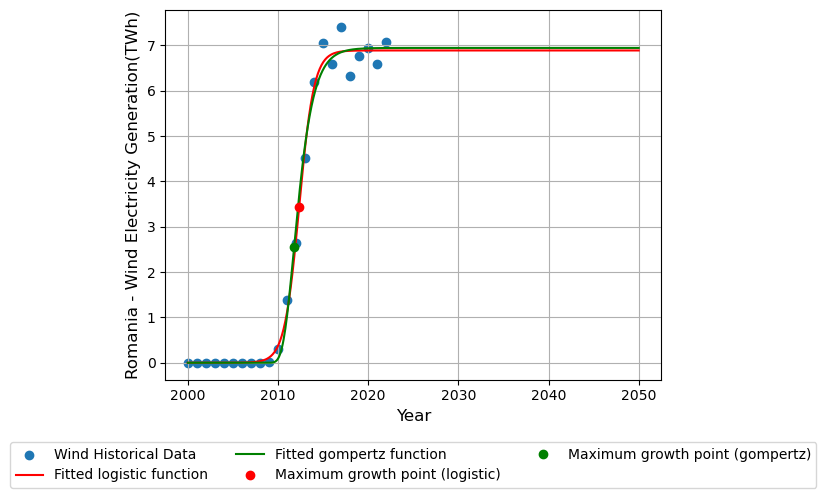

Logistic function parameters:
L_logistic=  6.1844344382600225
K_logistic=  1.8192270262612755
T_logistic(inflection point) =  2020.7229582750247
Maximum growth rate (logistic) =  2.8127225680559005
2050_logistic =  6.1844344382600225

Gompertz function parameters:
L_gompertz=  7.092585237106704
K_gompertz=  0.9954200917554169
T_gompertz(inflection point)=  2020.5157339277384
Maximum growth rate (gompertz) =  2.5972663222731915
2050_gompertz =  7.092585237105431


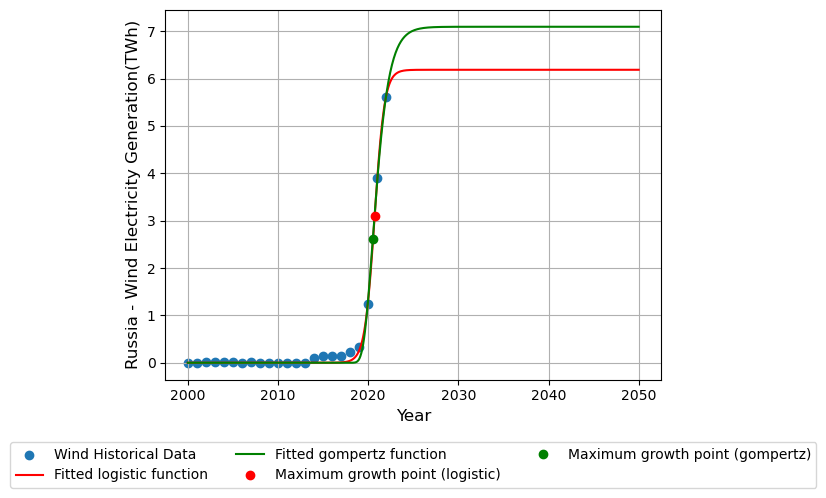

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2010.5
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2010.5
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


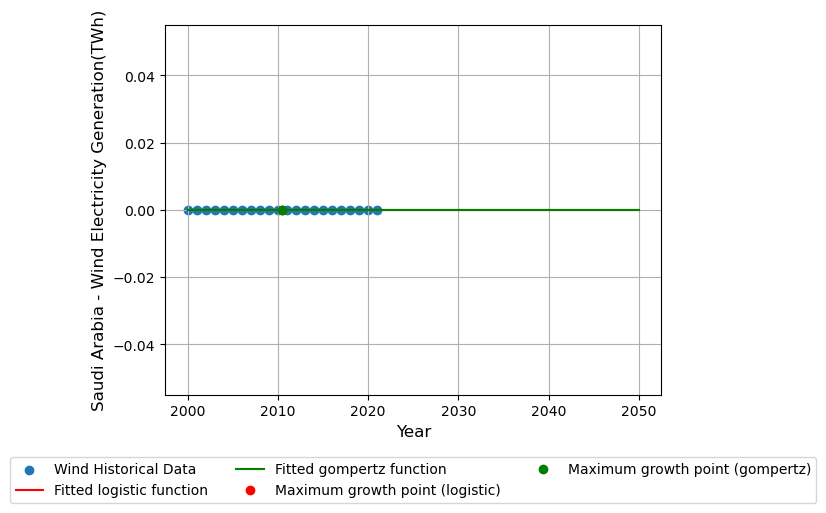

Logistic function parameters:
L_logistic=  8.9119983885275
K_logistic=  0.5993767463527286
T_logistic(inflection point) =  2016.8650344404514
Maximum growth rate (logistic) =  1.3354111494040934
2050_logistic =  8.91199836740505

Gompertz function parameters:
L_gompertz=  10.18808483760396
K_gompertz=  0.3287221684355983
T_gompertz(inflection point)=  2016.2252375025807
Maximum growth rate (gompertz) =  1.2320463996632542
2050_gompertz =  10.187931259579813


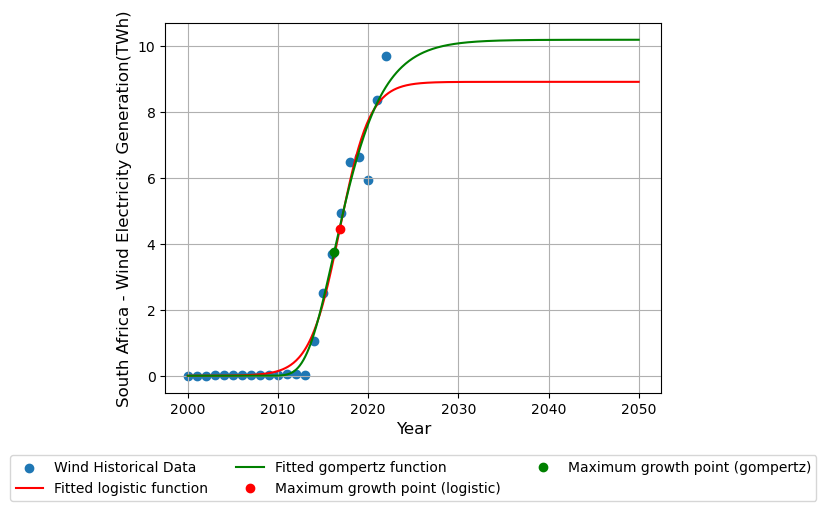

Logistic function parameters:
L_logistic=  4.919448085998065
K_logistic=  0.23451837585690496
T_logistic(inflection point) =  2018.28052455109
Maximum growth rate (logistic) =  0.2884252438101565
2050_logistic =  4.916557197358505

Gompertz function parameters:
L_gompertz=  11.71845808584114
K_gompertz=  0.07317560872643258
T_gompertz(inflection point)=  2024.5182064151272
Maximum growth rate (gompertz) =  0.3154585719512089
2050_gompertz =  10.036356222573362


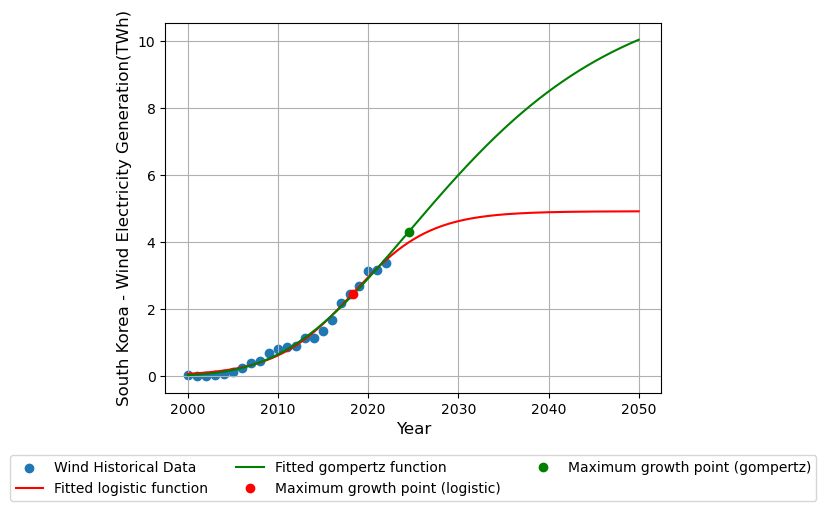

Logistic function parameters:
L_logistic=  56.755874046961225
K_logistic=  0.3279767855359285
T_logistic(inflection point) =  2006.9133719586453
Maximum growth rate (logistic) =  4.653652282551093
2050_logistic =  56.75583266457972

Gompertz function parameters:
L_gompertz=  59.93816746633389
K_gompertz=  0.20211171117897128
T_gompertz(inflection point)=  2005.2453964317033
Maximum growth rate (gompertz) =  4.456567183256291
2050_gompertz =  59.931099446974606


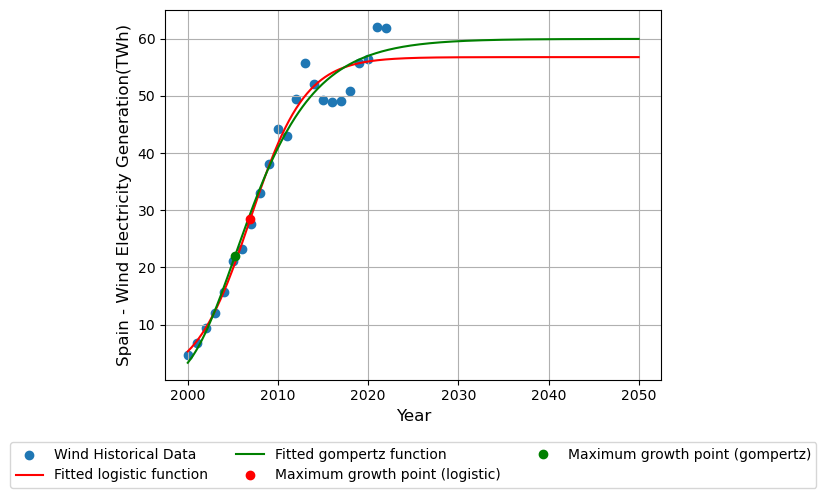

Logistic function parameters:
L_logistic=  50.35625797882768
K_logistic=  0.2327388369188439
T_logistic(inflection point) =  2019.8133087113326
Maximum growth rate (logistic) =  2.9299642283944016
2050_logistic =  50.31154005805416

Gompertz function parameters:
L_gompertz=  116.74130711656295
K_gompertz=  0.07558606441880643
T_gompertz(inflection point)=  2025.5408106985467
Maximum growth rate (gompertz) =  3.2461740602704174
2050_gompertz =  99.7363652202288


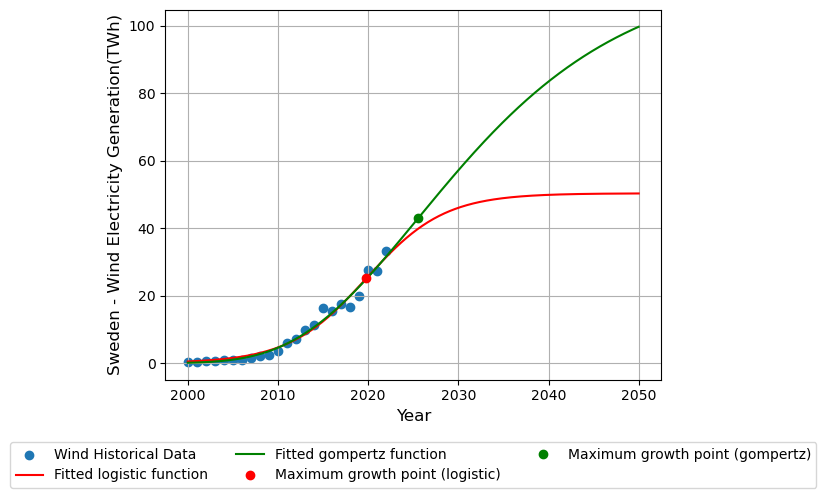

Logistic function parameters:
L_logistic=  0.126226868565777
K_logistic=  0.5465650978165902
T_logistic(inflection point) =  2011.016661725294
Maximum growth rate (logistic) =  0.017247800191183948
2050_logistic =  0.12622686849536144

Gompertz function parameters:
L_gompertz=  0.12860989745285495
K_gompertz=  0.3852520750087306
T_gompertz(inflection point)=  2009.9595560723271
Maximum growth rate (gompertz) =  0.018227407232626808
2050_gompertz =  0.12860987174927904


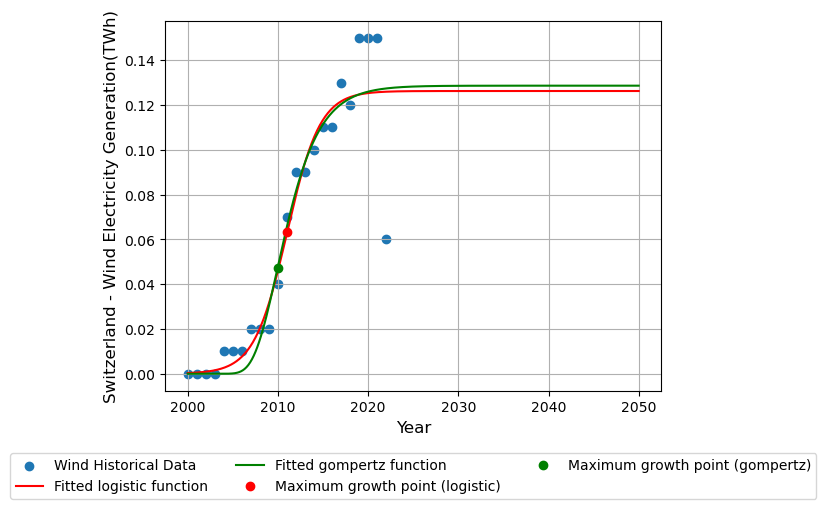

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2010.5
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2010.5
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


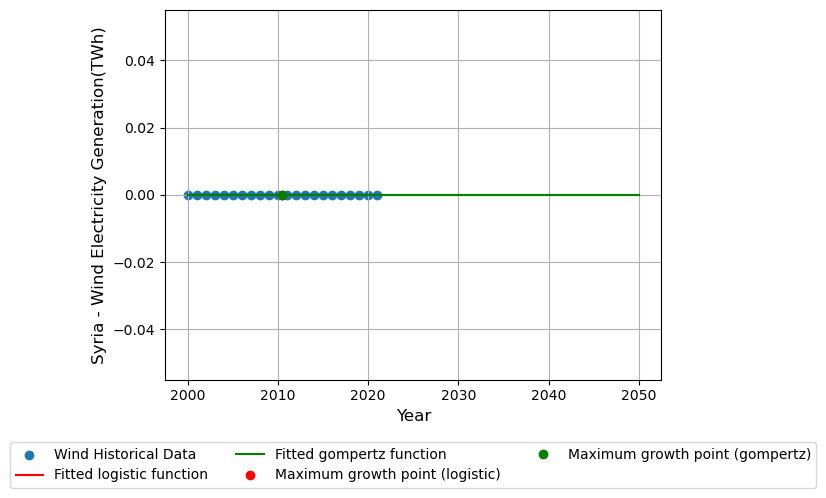

Logistic function parameters:
L_logistic=  3.6712098154616943
K_logistic=  1.38619963464007
T_logistic(inflection point) =  2017.7836033681558
Maximum growth rate (logistic) =  1.27225742622001
2050_logistic =  3.6712098154616943

Gompertz function parameters:
L_gompertz=  3.7293640260173526
K_gompertz=  0.9460913129854682
T_gompertz(inflection point)=  2017.3192037451827
Maximum growth rate (gompertz) =  1.2979959881406713
2050_gompertz =  3.7293640260172136


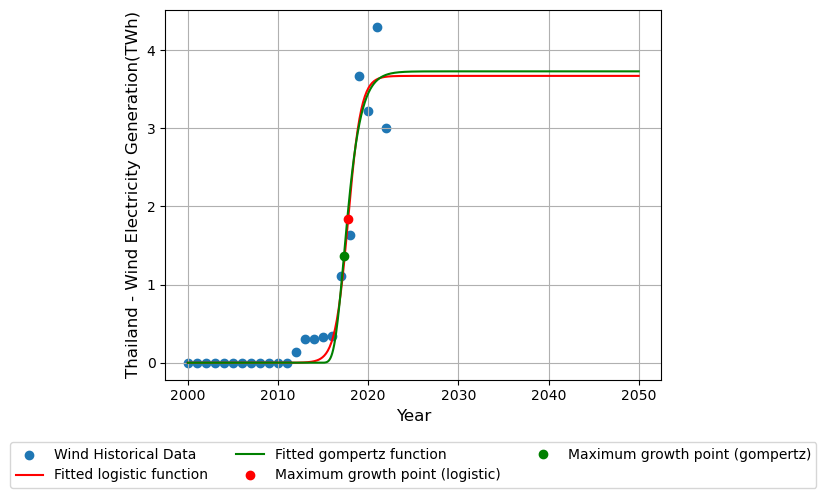

Logistic function parameters:
L_logistic=  51.3980565531398
K_logistic=  0.28036007227576176
T_logistic(inflection point) =  2019.599970221379
Maximum growth rate (logistic) =  3.6024907125179912
2050_logistic =  51.387838027999

Gompertz function parameters:
L_gompertz=  118.94315291918575
K_gompertz=  0.090284387441405
T_gompertz(inflection point)=  2024.4067051289253
Maximum growth rate (gompertz) =  3.9505505239483094
2050_gompertz =  107.71096554595941


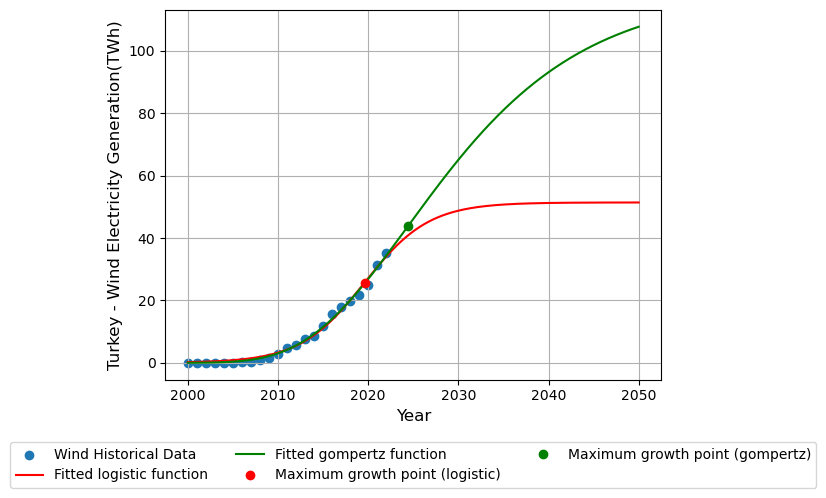

Logistic function parameters:
L_logistic=  3.256735320902209
K_logistic=  0.44041056280889385
T_logistic(inflection point) =  2017.393558782649
Maximum growth rate (logistic) =  0.35857515889953634
2050_logistic =  3.2567334319654515

Gompertz function parameters:
L_gompertz=  4.12948828716076
K_gompertz=  0.1989488063354174
T_gompertz(inflection point)=  2016.9278703358248
Maximum growth rate (gompertz) =  0.3022338437852301
2050_gompertz =  4.123759212786584


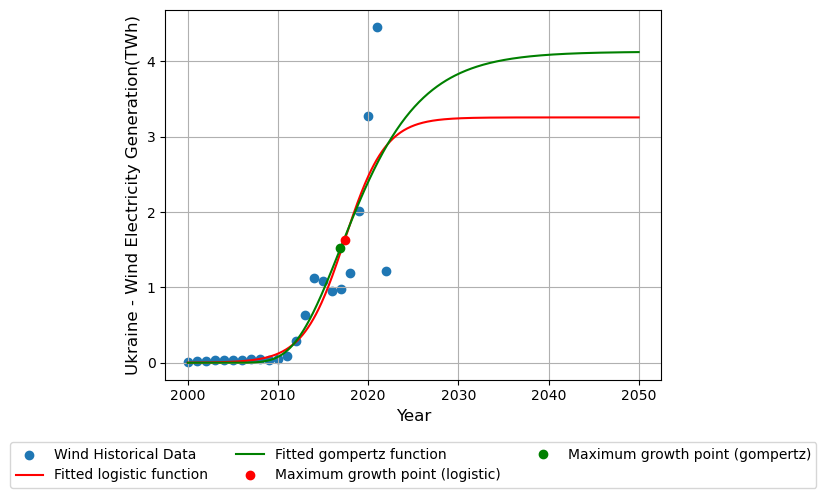

Logistic function parameters:
L_logistic=  0.0
K_logistic=  1.0
T_logistic(inflection point) =  2010.5
Maximum growth rate (logistic) =  0.0
2050_logistic =  0.0

Gompertz function parameters:
L_gompertz=  0.0
K_gompertz=  1.0
T_gompertz(inflection point)=  2010.5
Maximum growth rate (gompertz) =  0.0
2050_gompertz =  0.0


/Users/yanshiqi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


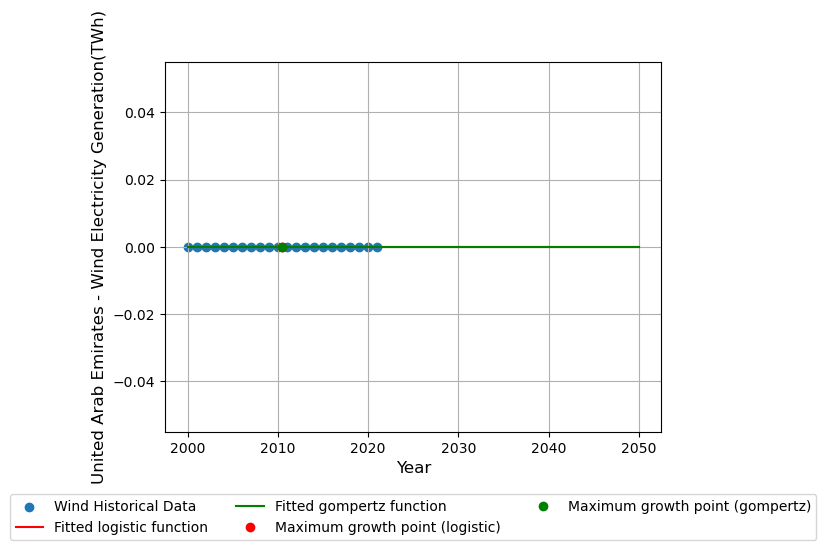

Logistic function parameters:
L_logistic=  91.0529750941297
K_logistic=  0.29488370023581173
T_logistic(inflection point) =  2016.27531468589
Maximum growth rate (logistic) =  6.712509553309044
2050_logistic =  91.0486071659634

Gompertz function parameters:
L_gompertz=  135.68128106836176
K_gompertz=  0.12217387310165434
T_gompertz(inflection point)=  2017.0560733912266
Maximum growth rate (gompertz) =  6.098229934058391
2050_gompertz =  133.27879975628127


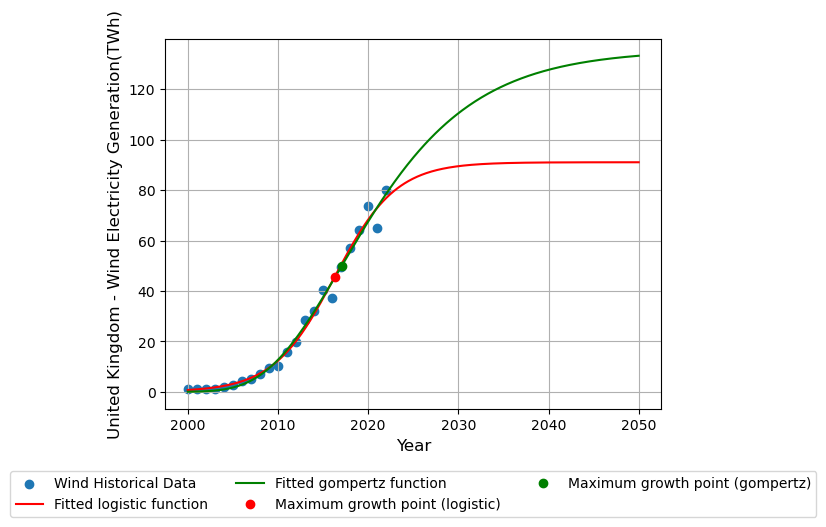

Logistic function parameters:
L_logistic=  605.1543304498805
K_logistic=  0.21028389696172395
T_logistic(inflection point) =  2018.4935480184245
Maximum growth rate (logistic) =  31.81355271756593
2050_logistic =  604.3527271958319

Gompertz function parameters:
L_gompertz=  1210.3018996683747
K_gompertz=  0.07375305613678199
T_gompertz(inflection point)=  2023.002956322102
Maximum growth rate (gompertz) =  32.838193234473295
2050_gompertz =  1055.8294494849608


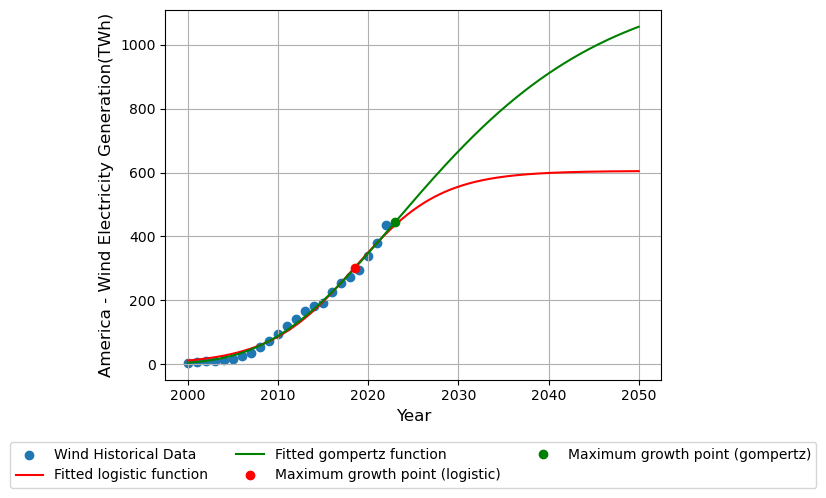

Logistic function parameters:
L_logistic=  0.09000000001446512
K_logistic=  20.131318210110276
T_logistic(inflection point) =  2011.9889156016359
Maximum growth rate (logistic) =  0.4529546598002817
2050_logistic =  0.09000000001446512

Gompertz function parameters:
L_gompertz=  0.09000000008314701
K_gompertz=  18.07382355976618
T_gompertz(inflection point)=  2011.97059884925
Maximum growth rate (gompertz) =  0.5984089305426663
2050_gompertz =  0.09000000008314701


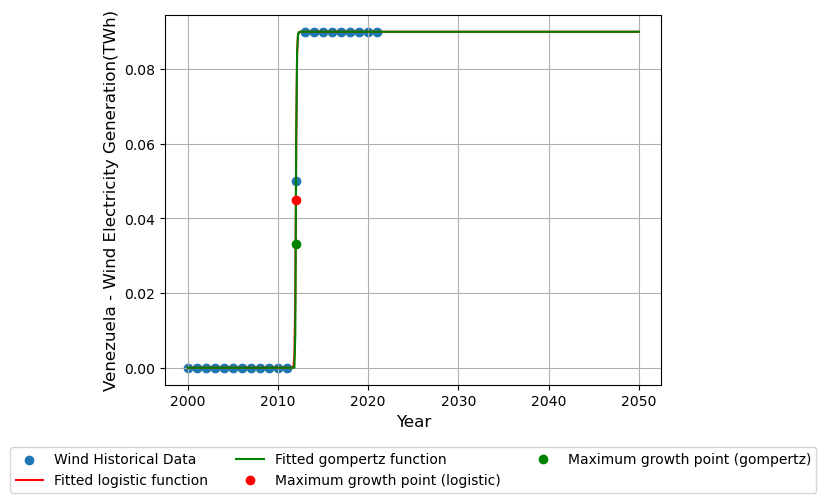

An error occurred with Vietnam: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.
Logistic function parameters:
L_logistic=  4348.472225452136
K_logistic=  0.1970485996145099
T_logistic(inflection point) =  2022.4459024974394
Maximum growth rate (logistic) =  214.21509062198368
2050_logistic =  4329.486112650442

Gompertz function parameters:
L_gompertz=  27160.16411835021
K_gompertz=  0.04410886441521529
T_gompertz(inflection point)=  2043.3543177714023
Maximum growth rate (gompertz) =  440.7210407871637
2050_gompertz =  12881.97167377946


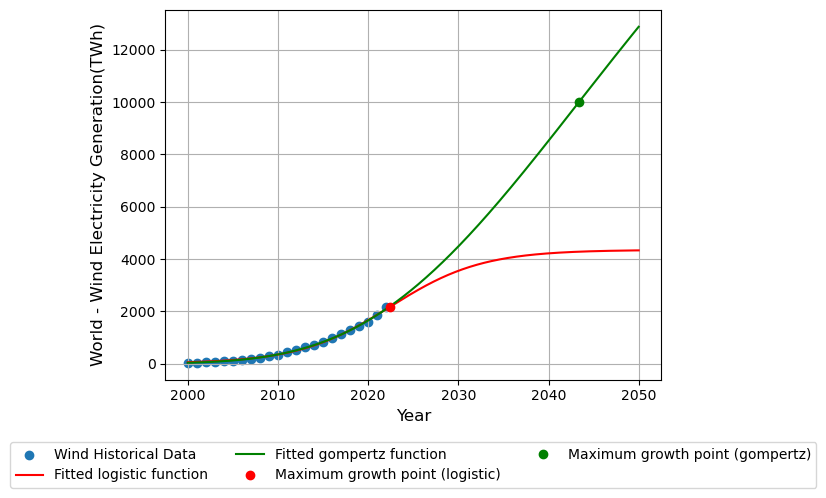

In [23]:
# Solar Power
import pandas as pd

df = pd.read_csv('Data.csv')

filtered_df = df[(df['Variable']=='Wind') & (df['Category']=='Electricity generation') & (df['Unit']=='TWh')]
countries = filtered_df['Area'].unique()

# Countries List
countries_to_analyze = ['United Arab Emirates', 'Argentina', 'Austria', 'Australia', 'Bangladesh', 'Belgium', 'Bulgaria', 'Brazil', 'Belarus', 'Canada', 'Switzerland', 'Chile', 'China', 'Colombia', 'Czechia', 'Germany', 'Denmark', 'Algeria', 'Egypt', 'Spain', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India', 'Iraq', 'Iran', 'Italy', 'Japan', 'South Korea', 'Kuwait', 'Kazakhstan', 'Mexico', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Philippines', 'Pakistan', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Sweden', 'Syria', 'Thailand', 'Turkey', 'Ukraine', 'America', 'Venezuela', 'Vietnam', 'South Africa','World']

countries = [country for country in countries if country in countries_to_analyze]

for country in countries:
    try:
        analyze_data('Data.csv', 'Wind', 'Electricity generation', 'TWh', country)
    except Exception as e:
        print(f"An error occurred with {country}: {e}")

